<h3>Nama: Caraka Rahman</h3>

<h1>Import Necessary Libraries</h1>

<p>Di bawah ini merupakan libraries yang akan digunakan pada project ini.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2, convert_continent_code_to_continent_name
from sklearn.preprocessing import LabelEncoder

<h1>Load Datasets</h1>

<p>Datasets yang digunakan pada project ini merupakan Life Expectancy Data yang berasal dari <strong>World Health Organization(WHO)</strong>.</p>

<p>Function <strong>read_csv</strong> dari pandas digunakan untuk membaca file <strong>.csv</strong>.</p>

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
df = df.drop(columns=['Adult Mortality'])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

Country  Year      Status  Life expectancy   infant deaths  Alcohol  \
0  Afghanistan  2015  Developing              65.0             62     0.01   
1  Afghanistan  2014  Developing              59.9             64     0.01   
2  Afghanistan  2013  Developing              59.9             66     0.01   
3  Afghanistan  2012  Developing              59.5             69     0.01   
4  Afghanistan  2011  Developing              59.2             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   ...  Polio  \
0               71.279624         65.0      1154   19.1  ...    6.0   
1               73.523582         62.0       492   18.6  ...   58.0   
2               73.219243         64.0       430   18.1  ...   62.0   
3               78.184215         67.0      2787   17.6  ...   67.0   
4                7.097109         68.0      3013   17.2  ...   68.0   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0               8.16         65.0        0.1  584.259210  33736494.0   
1               8.18         62.0        0.1  612.696514    327582.0   
2               8.13         64.0        0.1  631.744976  31731688.0   
3               8.52         67.0        0.1  669.959000   3696958.0   
4               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 21 columns]

<p>Dari informasi di atas dapat dilihat bahwa Datasets memiliki data berjumlah 2938 data, dengan jumlah feature sebanyak 21.</p>

<p>Kode di bawah digunakan untuk mengetahui ada berapa total negara yang terdapat pada Datasets.</p>

In [3]:
df['Country'].value_counts()

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64

<p>Hasil dari fungsi <strong>value_counts()</strong> di atas dapat dilihat bahwa jumlah negara pada Datasets berjumlah 193 negara.</p>

In [5]:
# country_dict = {}
# num = 1

# for country in df['Country']:
#     if country not in country_dict:
#         country_dict[country] = num
#     elif country in country_dict:
#         continue
#     num += 1

# print(country_dict)

In [6]:
# country_dict['Zimbabwe']

<h1>1. Data Preprocessing</h1>

<h2>1.1 Data Cleaning</h2>

<h3>1.1.1 Checking Missing Values</h3>

<p>Checking Missing Values dilakukan untuk mengecek kondisi suatu Datasets, apakah terdapat data yang kosong atau tidak. Jika terdapat data yang kosong, maka akan dilakukan pengisian data menggunakan metode tertentu.</p>

In [4]:
# Before Handle Missing Values
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

<p>Dari hasil pengecekan di atas, ternyata pada beberapa features terdapat missing values.</p>

<p>Berikut merupakan features yang memilki missing values.</p>

In [5]:
null_columns = df.columns[df.isna().any()]

null_columns

Index(['Life expectancy ', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio',
       'Total expenditure', 'Diphtheria ', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

<p>Berdasarkan kode di atas, dapat disimpulkan bahwa ada sebanyak 13 features yang memiliki missing values.</p>
<p>Selanjutnya akan dilakukan proses <strong>Imputasi</strong> untuk mengganti nilai kosong tersebut, menggunakan nilai <strong>mean</strong>.</p>

In [6]:
# Impute Using Mean
df.fillna(df[null_columns].mean(), inplace=True)

<p>Berikut merupakan hasil dari proses imputasi, dapat dilihat bahwa features yang sebelumnya terdapat missing values, setelah dilakukan proses imputasi menggunakan nilai mean total missing values nya menjadi 0.</p>

In [7]:
# After Handle Missing Values(Using Mean)
print(f'Total of Missing Values:\n{df.isna().sum()}\n')

Total of Missing Values:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64



<p>Kode di bawah berfungsi untuk mengecek jika terdapat data duplicate pada Datasets.</p>

<h3>1.1.2 Checking Duplicate Values</h3>

In [8]:
print(f'Jumlah Data Duplicate: {len(df)-len(df.drop_duplicates())}')

Jumlah Data Duplicate: 0


<p>Dari output di atas terlihat bahwa tidak ada data Duplicate pada Datasets.</p>

<p>Dikarenakan pada beberapa penamaan features terdapat spasi di awal dan akhir, maka untuk mempermudah proses pengerjaan spasi-spasi tersebut akan dihapus menggunakan function <strong>strip()</strong></p>

In [9]:
df.columns = df.columns.str.strip()

df.head()

Country  Year      Status  Life expectancy  infant deaths  Alcohol  \
0  Afghanistan  2015  Developing             65.0             62     0.01   
1  Afghanistan  2014  Developing             59.9             64     0.01   
2  Afghanistan  2013  Developing             59.9             66     0.01   
3  Afghanistan  2012  Developing             59.5             69     0.01   
4  Afghanistan  2011  Developing             59.2             71     0.01   

   percentage expenditure  Hepatitis B  Measles   BMI  ...  Polio  \
0               71.279624         65.0     1154  19.1  ...    6.0   
1               73.523582         62.0      492  18.6  ...   58.0   
2               73.219243         64.0      430  18.1  ...   62.0   
3               78.184215         67.0     2787  17.6  ...   67.0   
4                7.097109         68.0     3013  17.2  ...   68.0   

   Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0               8.16        65.0       0.1  584.259210  33736494.0   
1               8.18        62.0       0.1  612.696514    327582.0   
2               8.13        64.0       0.1  631.744976  31731688.0   
3               8.52        67.0       0.1  669.959000   3696958.0   
4               7.87        68.0       0.1   63.537231   2978599.0   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 21 columns]

<h3>Append DataFrame</h3>

In [15]:
# def appendCountries(index):
#     df = df_categories[df_categories['index'] == index]
#     countryValue = None
#     for i, values in df.iterrows():
#         countryValue = values['Country']
    
#     return countryValue

# def appendStatus(index):
#     df = df_categories[df_categories['index'] == index]
#     statusValue = None
#     for i, values in df.iterrows():
#         statusValue = values['Status']
    
#     return statusValue

In [ ]:
# df['Country'] = df['index'].apply(appendCountries)
# df['Status'] = df['index'].apply(appendStatus)

# df.head(10)

In [ ]:
# df.head(10)

In [ ]:
# # Remove 'Index' Feature
# df = df.drop(columns=['index'])

# df.head()

<h1>2. Data Analysis</h1>

<p>Selanjutnya akan dilakukan proses Data Analysis yang dibagi menjadi 2 bagian, Univariate dan Multivariate Analysis.</p>

<h2>2.1 Univariate Analysis</h2>

<p>Univariate Analysis merupakan proses analisis data yang hanya berfokus pada 1 fitur saja.</p>

<h4>2.1.1 Categorical Features</h4>

<p>Kode di bawah ini berfungsi untuk mengelompokkan nama feature kategorik dan numerik, yang dipisahkan dengan 2 variables berbeda, yaitu numerical_features dan categorical_features.</p>
<p>Nantinya variables ini akan digunakan untuk mempermudah proses Data Analysis.</p>

In [10]:
numerical_features = []
categorical_features = ['Country', 'Status']

for col in df.columns:
    if df[col].dtype != 'object':
        numerical_features.append(col)

print(f'Jumlah feature numerik: {len(numerical_features)}\n')
print(f'Jumlah feature kategorik: {len(categorical_features)}')

Jumlah feature numerik: 19

Jumlah feature kategorik: 2


<p>Dari hasil di atas dapat dilihat bahwa features numerik berjumlah 19 dan kategorik berjumlah 2.</p>

<h5>A. Country</h5>

<p>Kode di bawah berfungsi untuk menampilakan 10 besar negara yang paling banyak muncul pada Datasets.</p>

                              Country  Total Sample  Percentage
0                         Afghanistan            16       0.545
126                        Azerbaijan            16       0.545
117  Lao People's Democratic Republic            16       0.545
118                           Bahrain            16       0.545
119                           Algeria            16       0.545
120                            Angola            16       0.545
121               Antigua and Barbuda            16       0.545
122                         Argentina            16       0.545
123                           Armenia            16       0.545
124                         Australia            16       0.545


<Figure size 10000x10000 with 0 Axes>

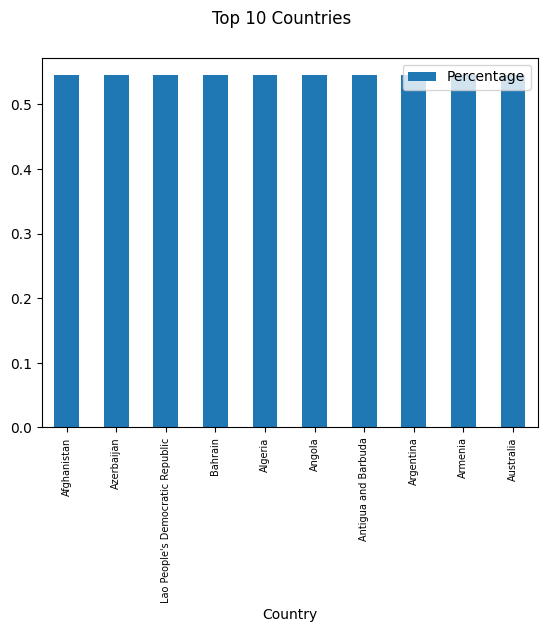

In [11]:
feature_country = categorical_features[0]
count = df[feature_country].value_counts()
percent = 100 * df[feature_country].value_counts(normalize=True)
df_country = pd.DataFrame({'Total Sample': count, 'Percentage': percent.round(3)})
df_country = df_country.reset_index()
df_country = df_country.sort_values(by='Percentage', ascending=False)

print(df_country.head(10))
# count.plot(kind='bar', title='Top 5 Countries')
df_country = df_country.head(10)
plt.figure(figsize=(100,100))
df_country.plot.bar(x='Country', y='Percentage', rot=90)
pl.suptitle('Top 10 Countries')
plt.xticks(fontsize=7)

plt.show()

<p>Dari Bar Plot di atas, dapat dilihat bahwa 10 besar negara yang paling banyak muncul pada Datasets diantaranya Afghanistan, Azerbaijan, Bahrain, Algeria, dll.</p>

<h5>B. Status</h5>

<p>Kode di bawah berfungsi untuk menampilkan jumlah sample Data pada masing-masing status(Developing & Developed)</p>

            Total Sample  Percentage
Status                              
Developing          2426       82.57
Developed            512       17.43


<Axes: title={'center': 'Status'}, xlabel='Status'>

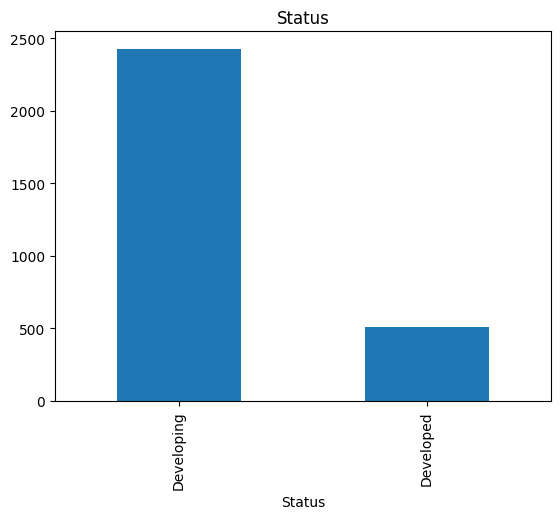

In [12]:
feature_status = categorical_features[1]
count = df[feature_status].value_counts()
percent = 100 * df[feature_status].value_counts(normalize=True)
df_status = pd.DataFrame({'Total Sample': count, 'Percentage': percent.round(2)})

print(df_status)
count.plot(kind='bar', title=feature_status)

<p>Dari Bar Plot di atas, terlihat bahwa jumlah sample data pada Status Developing(82.57%) lebih banyak dibandingkan dengan status Developed(17.43%).</p>

<h4>2.1.2 Numerical Features</h4>

<p>Kode di bawah berfungsi untuk melihat persebaran nilai mengggunakan Histogram pada setiap features nya.</p>

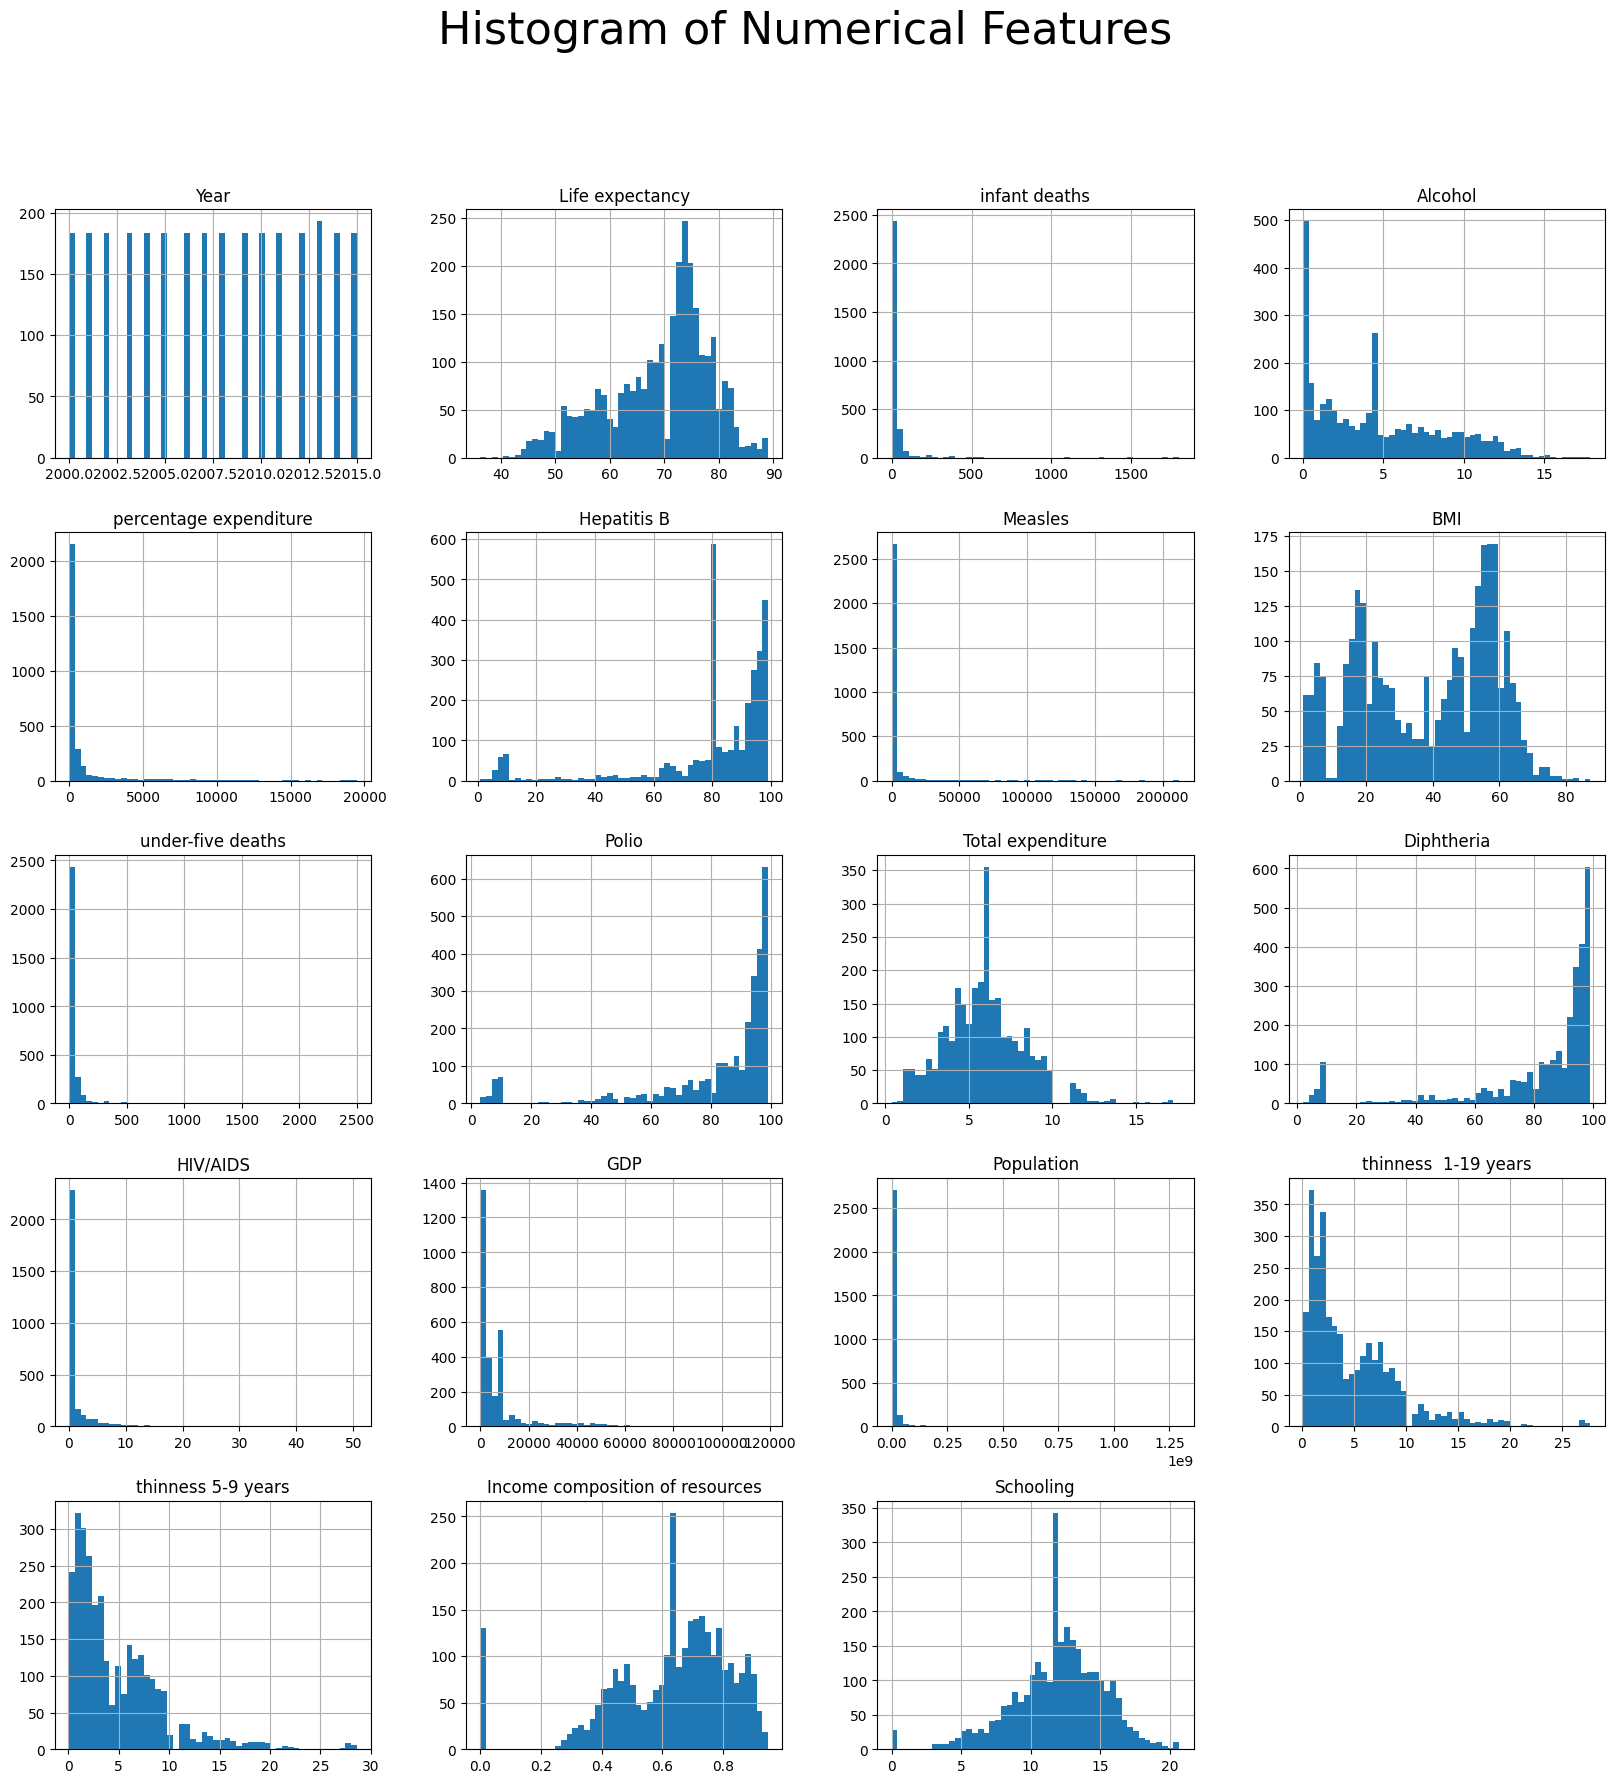

In [13]:
df.hist(bins=50, figsize=(20,20))
pl.suptitle('Histogram of Numerical Features', fontsize=32)
plt.show()

<p>Dari Histogram di atas, terlihat bahwa pada beberapa feature memilki kondisi <strong>Left/Right Skewed</strong>, sebagai contoh pada fitur Alcohol dan Polio. Tentu kondisi ini tidak baik jika tidak ditangani dengan baik, maka untuk menanganinya akan diimplementasi metode IQR(InterQuartile Range).</p>

<h2>2.2 Multivariate Analysis</h2>

<p>Multivariate Analysis merupakan proses analisis data terhadap 2 atau lebih features.</p>

<h4>2.2.1 Categorical Features</h4>

<h4>A. Country</h4>

<p>Kode di bawah ini berfungsi untuk mengurutkan DataFrame berdasarkan fitur Life Expectancy yang diurutkan secara Descending. Kemudian mengambil 5 negara teratas berdasarkan nilai Life Expectancy nya.</p>

In [14]:
top_5_country = df.sort_values(by='Life expectancy', ascending=False)
top_5_country = top_5_country.head(5)
top_5_country['Country-Year'] = top_5_country['Country'] + '-' + top_5_country['Year'].astype(str)

top_5_country

Country  Year      Status  Life expectancy  infant deaths  Alcohol  \
1850  New Zealand  2010   Developed             89.0              0     9.62   
915       Finland  2014  Developing             89.0              0     8.80   
241       Belgium  2014   Developed             89.0              0    12.60   
2433        Spain  2007   Developed             89.0              2    11.05   
2513       Sweden  2007   Developed             89.0              0     6.90   

      percentage expenditure  Hepatitis B  Measles   BMI  ...  \
1850             6664.148708     9.000000       43  64.8  ...   
915              6164.455402    80.940461        0  61.7  ...   
241              7163.348923    98.000000       70  63.4  ...   
2433              510.932701    96.000000      267  61.7  ...   
2513             7593.391622    80.940461        1  56.1  ...   

      Total expenditure  Diphtheria  HIV/AIDS          GDP    Population  \
1850              11.20        93.0       0.1  33691.34837  1.275338e+07   
915                9.68        98.0       0.1  49914.61864  5.461512e+06   
241                1.59        99.0       0.1  47439.39684  1.129570e+05   
2433               8.36        96.0       0.1   3279.41400  4.522683e+06   
2513               8.92        98.0       0.1  53324.37937  9.148920e+05   

      thinness  1-19 years  thinness 5-9 years  \
1850                   0.3                 0.3   
915                    0.9                 0.8   
241                    1.0                 1.0   
2433                   0.6                 0.5   
2513                   1.3                 1.3   

      Income composition of resources  Schooling      Country-Year  
1850                            0.899       20.3  New Zealand-2010  
915                             0.890       17.0      Finland-2014  
241                             0.890       16.3      Belgium-2014  
2433                            0.849       16.0        Spain-2007  
2513                            0.895       15.8       Sweden-2007  

[5 rows x 22 columns]

<p>Dari hasil pengurutan di atas, terlihat bahwa New Zealand, Finland, Belgium, Spain, dan Sweden merupakan negara dengan nilai Life Expectancy terbesar.</p>

<p>Kode di bawah ini berfungsi untuk menampilkan Bar Plot mengenai Rata-Rata Life Expectancy berdasarkan 5 negara teratas yang memiliki nilai Life Expectancy tertinggi.</p>

C:\Users\DELL\AppData\Local\Temp\ipykernel_23720\1744305112.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Country-Year', y='Life expectancy', kind='bar', dodge=False, height=4, aspect=3, data=top_5_country, palette='husl')


Text(0.5, 1.0, 'Life Expectancy Average Over Top 5 Countries')

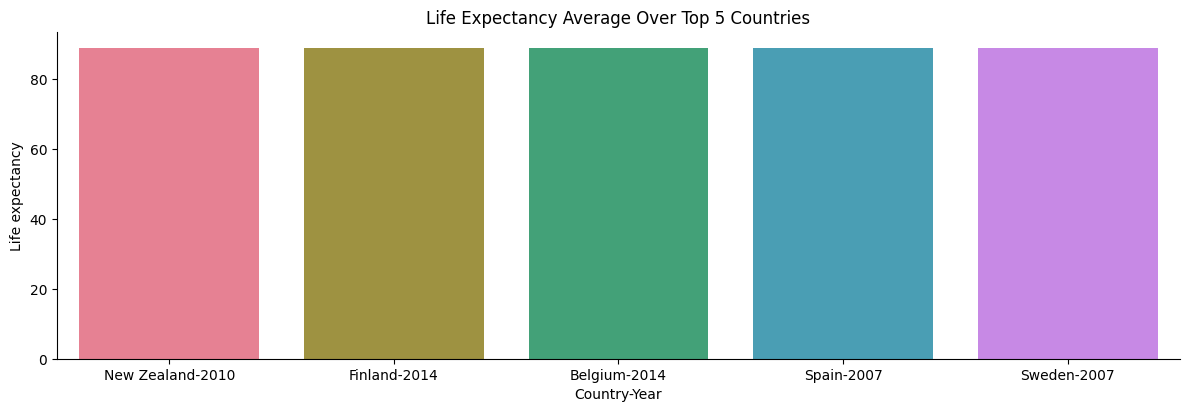

In [15]:
sns.catplot(x='Country-Year', y='Life expectancy', kind='bar', dodge=False, height=4, aspect=3, data=top_5_country, palette='husl')
plt.title('Life Expectancy Average Over Top 5 Countries')

<h4>B. Status</h4>

<p>Kode di bawah ini berfungsi untuk menampilkan Bar Plot mengenai Rata-Rata Life Expectancy berdasarkan feature Status.</p>

C:\Users\DELL\AppData\Local\Temp\ipykernel_23720\2236395091.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Status', y='Life expectancy', kind='bar', dodge=False, height=4, aspect=3, data=df, palette='husl')


Text(0.5, 1.0, 'Life Expectancy Average Over Status')

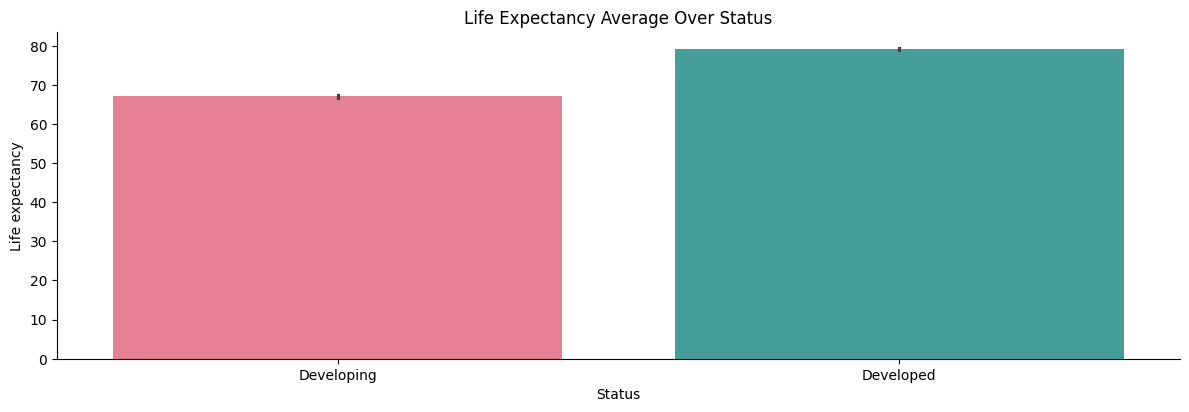

In [16]:
sns.catplot(x='Status', y='Life expectancy', kind='bar', dodge=False, height=4, aspect=3, data=df, palette='husl')
plt.title('Life Expectancy Average Over Status')

<p>Berdasarkan Bar Plot di atas dapat dilihat bahwa negara yang maju(Developed) memilki rata-rata nilai Life Expectancy yang lebih besar dibandingkan dengan negara berkembang(Developing).</p>

<h4>2.2.2 Numerical Features</h4>

<p>Kode di bawah berfungsi untuk melihat korelasi antar features, terutama dengan feature label yaitu <strong>Life Expectancy</strong>.</p>

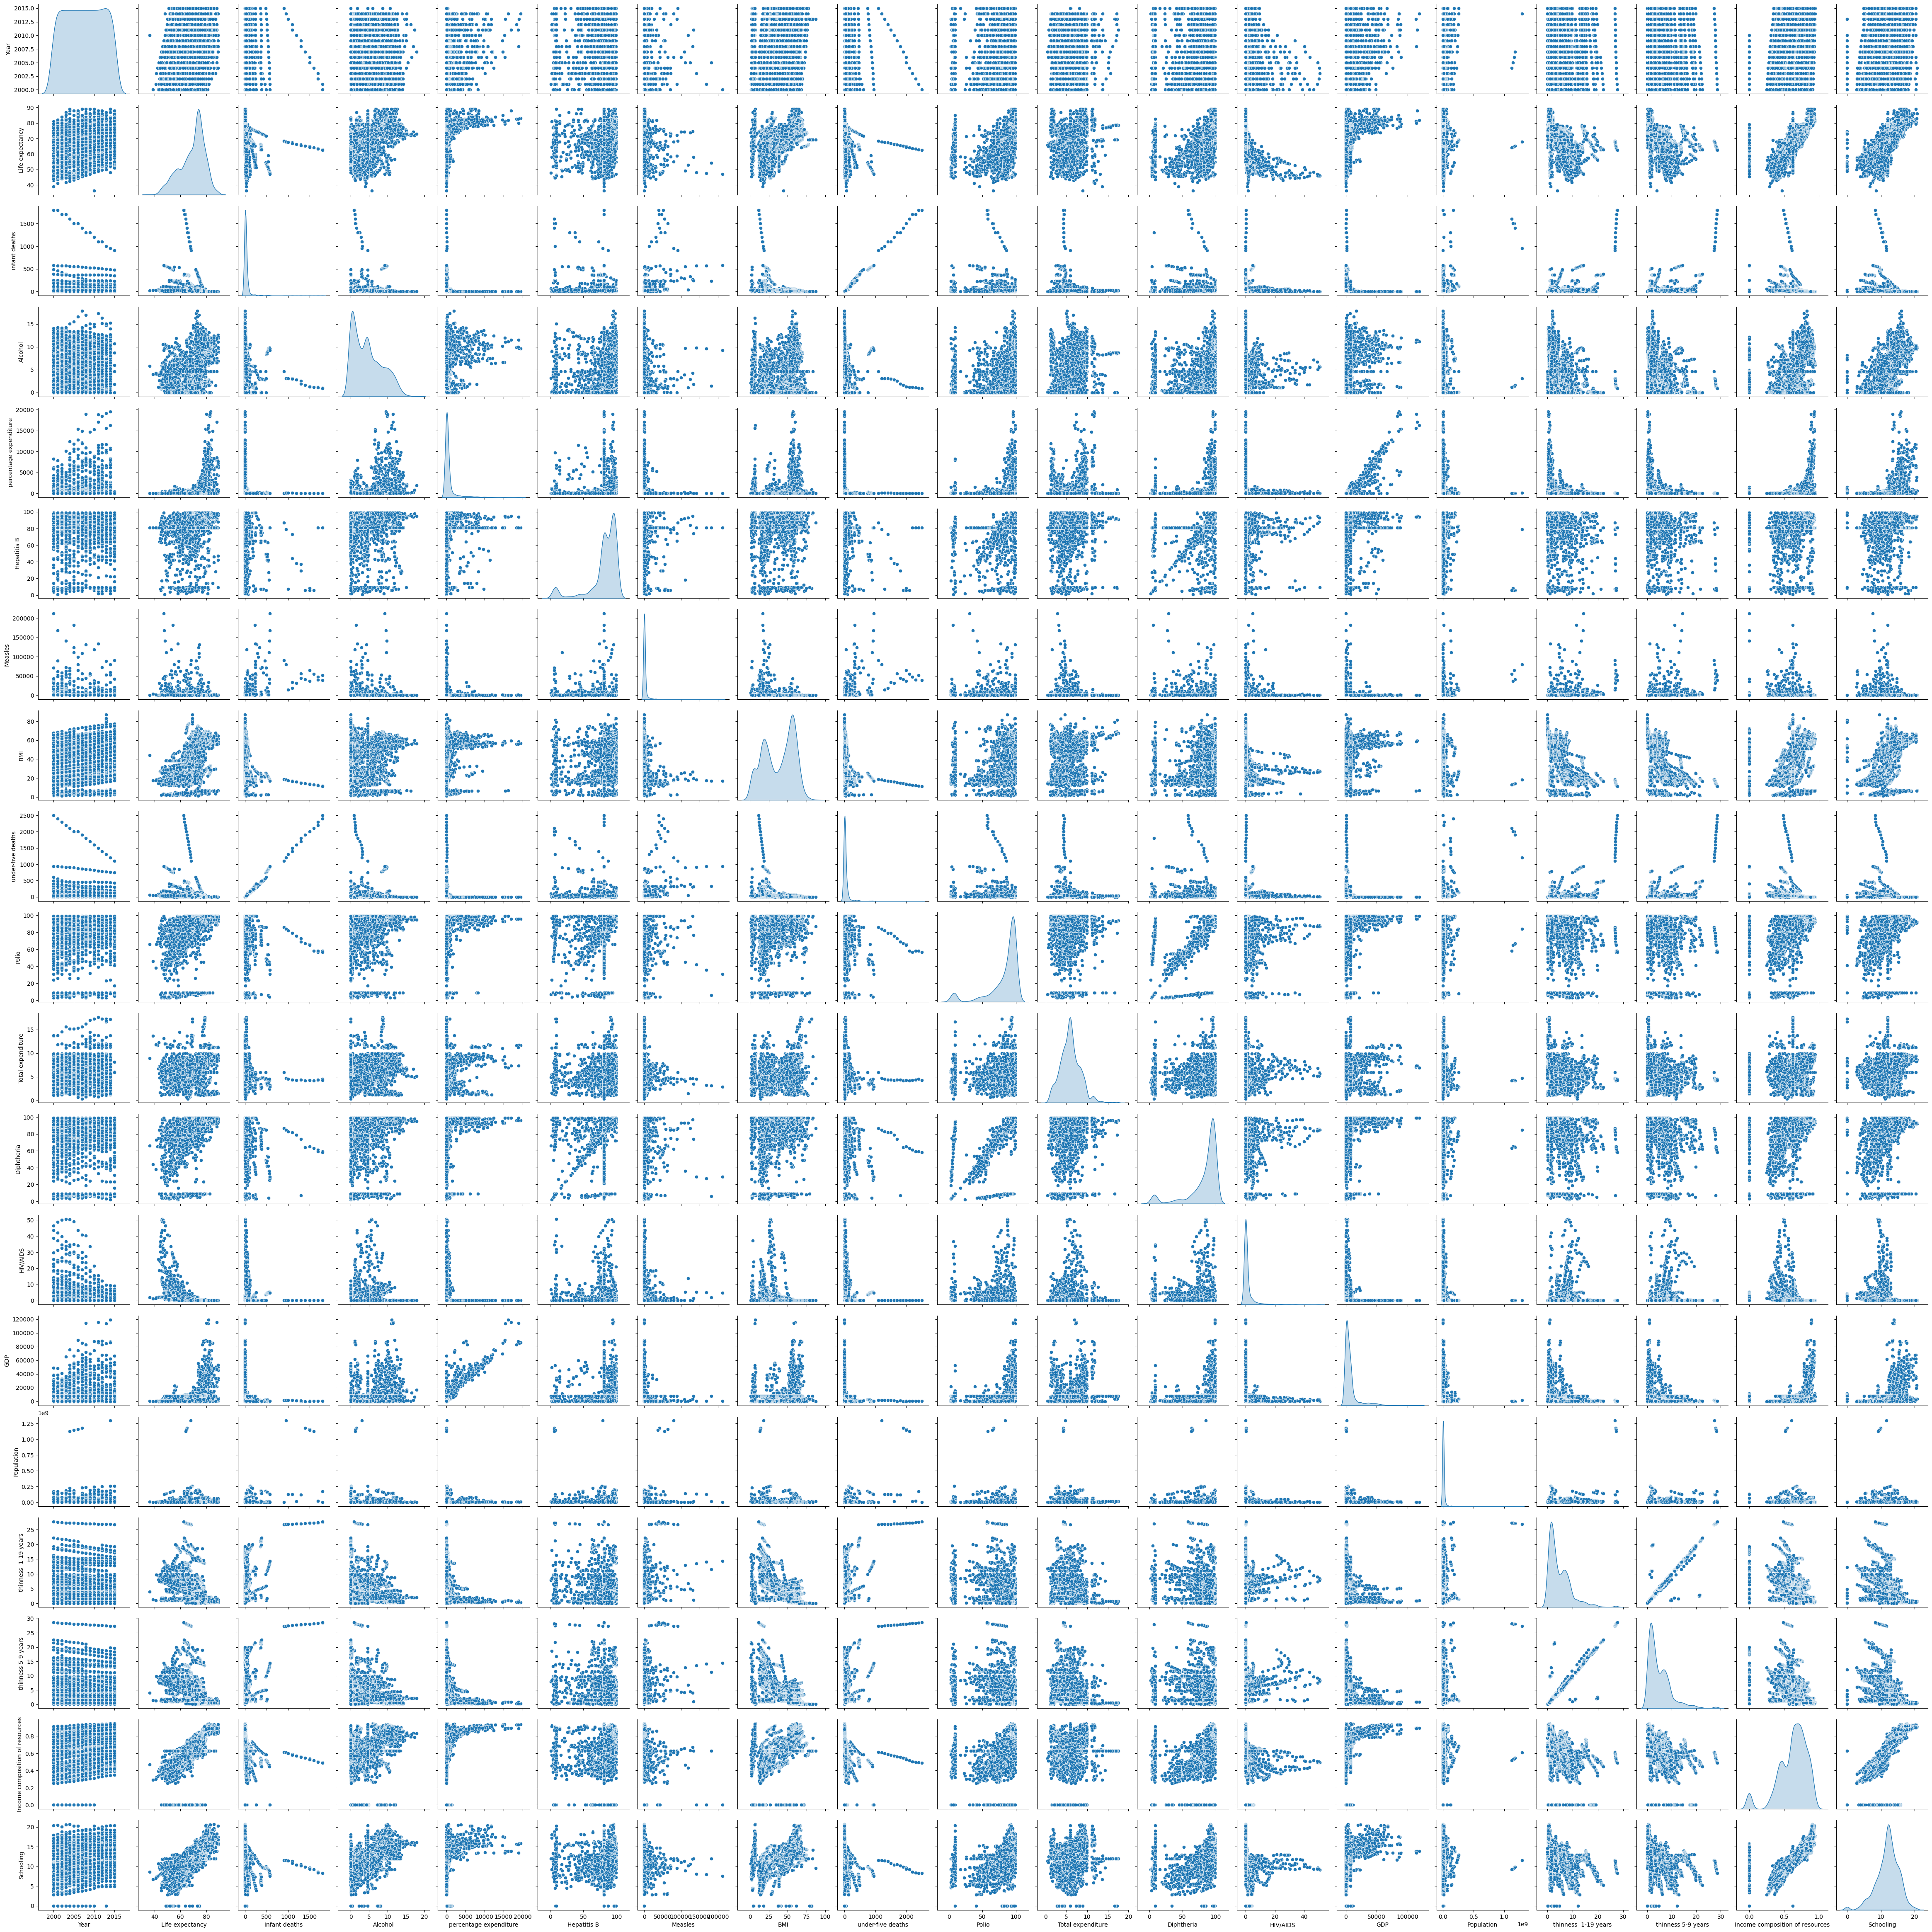

In [17]:
sns.pairplot(df, diag_kind='kde')

<p>Dari Visualization di atas, terdapat beberapa feature yang memiliki korelasi yang lemah terhadap feature Life Expectancy, contohnya <strong>Year</strong> dan <strong>Measles</strong>.</p>

<p>Kode di bawah ini berfungsi untuk melihat korelasi antar features menggunakan Heatmap.</p>

Text(0.5, 1.0, 'Matrix Correlation of Numeric Features')

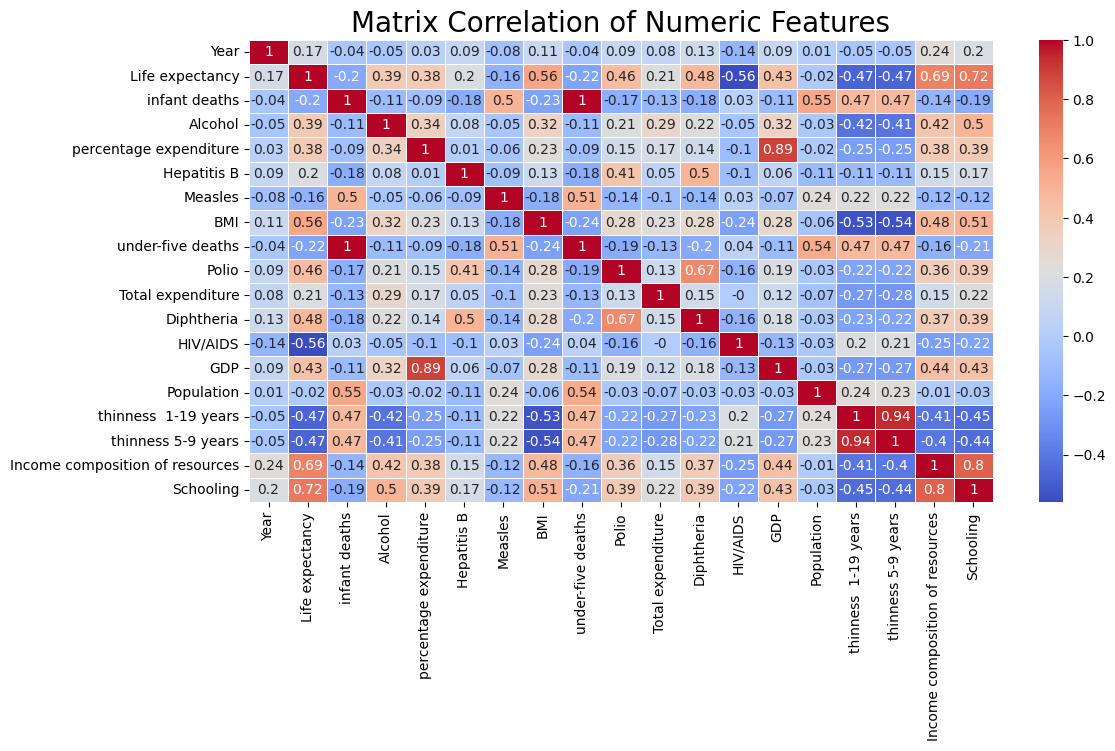

In [18]:
# Heatmap Visualization
plt.figure(figsize=(12,6))
correlation_matrix = df[numerical_features].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrix Correlation of Numeric Features', size=20)

<p>Berikut merupakan beberapa insight yang didapatkan dari 2 Visualizations di atas :</p>
<ul>
    <li>Infant Deaths = -0.2 (Correlation Lemah)</li>
    <li>Measles = -0.16 (There is no patterns)</li>
    <li>Under-Five Deaths = -0.22 (Correlation Lemah)</li>
    <li>HIV/AIDS = -0.56 (Correlation Lemah)</li>
    <li>Population = -0.02 (There is no patterns)</li>
    <li>1-19 Years = -0.47 (There is no patterns)</li>
    <li>5-9 Years = -0.47 (Correlation tinggi)</li>
</ul>








<h2>1.1 Data Cleaning(Continued)</h2>

<p>Kode di bawah ini berfungsi untuk menghapus feature yang memilki korelasi lemah terhadap feature Life Expectancy.</p>

In [19]:
df = df.drop(columns=['Year','under-five deaths','thinness  1-19 years','Measles'])

In [20]:
removed_features = ['Year','under-five deaths','thinness  1-19 years','Measles']

print(f'Num of Features Before Remove: {len(numerical_features)}')

for feature in removed_features:
    if feature in numerical_features:
        numerical_features.remove(feature)

print(f'Num of Features After Remove: {len(numerical_features)}')

Num of Features Before Remove: 19
Num of Features After Remove: 15


<p>Berdasarkan hasil di atas, dapat dilihat bahwa jumlah numerical features yang sebelumnya berjumlah 19 setelah dilakukan penghapusan menjadi berjumlah 15 features.</p>

<p>Kode di bawah ini berfungsi untuk melihat jumlah negara yang terdapat pada Library <strong>pycountry_convert</strong>.</p>

In [21]:
from pycountry_convert import map_countries

map_countries = map_countries()

print(len(map_countries))

460


<p>Dari hasil di atas terlihat bahwa jumlah negara pada Library pycountry_convert berjumlah 460 negara.</p>

<p>Kode di bawah ini berfungsi untuk melakukan mapping dari country ke continent.</p>

In [22]:
def map_country2continent(country_name):
    try:
        code= country_alpha2_to_continent_code(country_name_to_country_alpha2(country_name))
        continent = convert_continent_code_to_continent_name(code)
        return continent
    except Exception as e:
        if str(e) == '"Invalid Country Alpha-2 code: \'TL\'"':
            continent = 'Asia'
            return continent

<p>Kode di bawah ini berfungsi untuk mengeksekusi function <strong>map_country2continent</strong>.</p>

In [23]:
df['Country'].replace('Republic of Korea', 'South Korea', inplace=True)
df['Continent'] = df['Country'].apply(map_country2continent)

df = df.drop(columns=['Country'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_23720\456411170.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].replace('Republic of Korea', 'South Korea', inplace=True)


In [24]:
df.head()

Status  Life expectancy  infant deaths  Alcohol  \
0  Developing             65.0             62     0.01   
1  Developing             59.9             64     0.01   
2  Developing             59.9             66     0.01   
3  Developing             59.5             69     0.01   
4  Developing             59.2             71     0.01   

   percentage expenditure  Hepatitis B   BMI  Polio  Total expenditure  \
0               71.279624         65.0  19.1    6.0               8.16   
1               73.523582         62.0  18.6   58.0               8.18   
2               73.219243         64.0  18.1   62.0               8.13   
3               78.184215         67.0  17.6   67.0               8.52   
4                7.097109         68.0  17.2   68.0               7.87   

   Diphtheria  HIV/AIDS         GDP  Population  thinness 5-9 years  \
0        65.0       0.1  584.259210  33736494.0                17.3   
1        62.0       0.1  612.696514    327582.0                17.5   
2        64.0       0.1  631.744976  31731688.0                17.7   
3        67.0       0.1  669.959000   3696958.0                18.0   
4        68.0       0.1   63.537231   2978599.0                18.2   

   Income composition of resources  Schooling Continent  
0                            0.479       10.1      Asia  
1                            0.476       10.0      Asia  
2                            0.470        9.9      Asia  
3                            0.463        9.8      Asia  
4                            0.454        9.5      Asia

<p>DataFrame di atas merupakan hasil dari eksekusi function <strong>map_country2continent</strong>. Dimana dibuat satu feature baru bernama <strong>Continent</strong>. Kemudian menghapus feature <strong>Country</strong>, dikarenakan sudah tidak akan digunakan lagi.</p>

<p>Kode di bawah ini berfungsi untuk melihat value unique pada feature <strong>Continent</strong> yang baru saja dibuat.</p>

In [25]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', None], dtype=object)

<p>Terlihat bahwa negara yang sebelumnya berjumlah 193, berhasil di Mapping kedalam 6 benua berbeda.</p>

<p>Kode di bawah ini berfungsi untuk melihat Rata-Rata nilai Life Expectancy di tiap benuanya.</p>

Text(0.5, 1.0, 'Life Expectancy Average Over Continent')

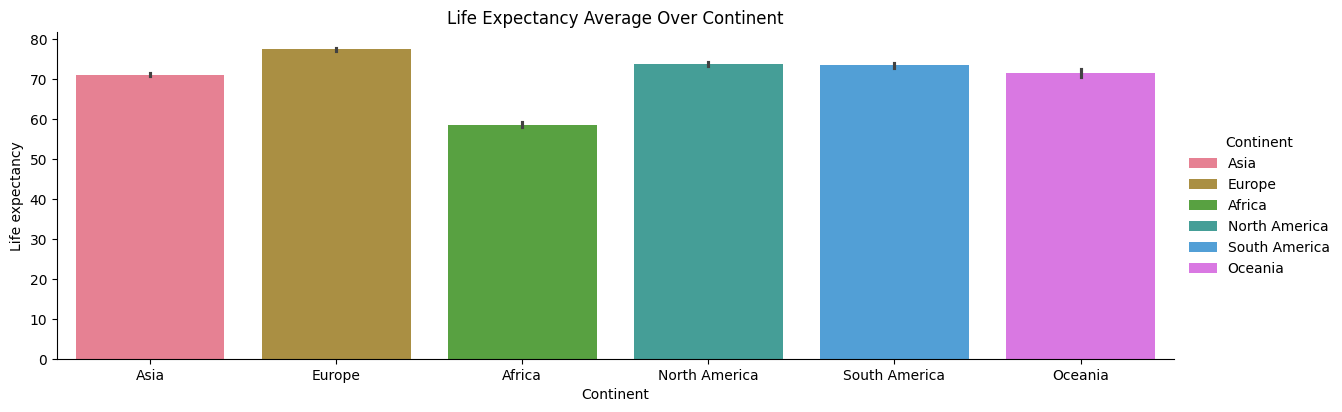

In [26]:
sns.catplot(x='Continent', y='Life expectancy', kind='bar', dodge=False, height=4, aspect=3, hue='Continent', data=df, palette='husl')
plt.title('Life Expectancy Average Over Continent')

<p>Dari Bar Plot di atas terlihat jelas bahwa Rata-Rata Life Expectancy <strong>terendah</strong> berada di benua Africa, dan <strong>tertinggi</strong> berada di benua Eropa.</p>

<h3>Label Encoder</h3>

<p>Kode di bawah ini berfungsi untuk melakukan convert dari data kategorik menjadi numerik pada feature <strong>Continent</strong> dan <strong>Status</strong>.</p>

In [27]:
df['Continent'] = LabelEncoder().fit_transform(df['Continent'])
df['Status'] = LabelEncoder().fit_transform(df['Status'])

In [28]:
df.head()

Status  Life expectancy  infant deaths  Alcohol  percentage expenditure  \
0       1             65.0             62     0.01               71.279624   
1       1             59.9             64     0.01               73.523582   
2       1             59.9             66     0.01               73.219243   
3       1             59.5             69     0.01               78.184215   
4       1             59.2             71     0.01                7.097109   

   Hepatitis B   BMI  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0         65.0  19.1    6.0               8.16        65.0       0.1   
1         62.0  18.6   58.0               8.18        62.0       0.1   
2         64.0  18.1   62.0               8.13        64.0       0.1   
3         67.0  17.6   67.0               8.52        67.0       0.1   
4         68.0  17.2   68.0               7.87        68.0       0.1   

          GDP  Population  thinness 5-9 years  \
0  584.259210  33736494.0                17.3   
1  612.696514    327582.0                17.5   
2  631.744976  31731688.0                17.7   
3  669.959000   3696958.0                18.0   
4   63.537231   2978599.0                18.2   

   Income composition of resources  Schooling  Continent  
0                            0.479       10.1          1  
1                            0.476       10.0          1  
2                            0.470        9.9          1  
3                            0.463        9.8          1  
4                            0.454        9.5          1

<p>Kode di bawah ini berfungsi untuk melihat value pada features Status dan juga Continent setelah dilakukan Label Encoder.</p>

In [29]:
df['Status'].value_counts()

Status
1    2426
0     512
Name: count, dtype: int64

In [30]:
df['Continent'].value_counts()

Continent
0    864
1    736
2    610
3    338
5    160
4    150
6     80
Name: count, dtype: int64

<h2>1.2 Data Transformation</h2>

<p>Kode di bawah ini berfungsi untuk mengambil seluruh features pada DataFrame dan di masukkan kedalam variable df_features.</p>

In [31]:
df_features = df.columns

<p>Kode di bawah ini berfungsi untuk menampilkan value pada variable df_features yang berisi nama-nama features pada DataFrame.</p>

In [32]:
df_features

Index(['Status', 'Life expectancy', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'BMI', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Continent'],
      dtype='object')

<p>Output di atas merupakan features yang terdapat pada DataFrame.</p>

<h3>1.2.1 Outliers Removal</h3>

<p>Kode di bawah berfungsi untuk mengidentifikasi Outliers pada seluruh features pada DataFrame.</p>

<Axes: xlabel='variable', ylabel='value'>

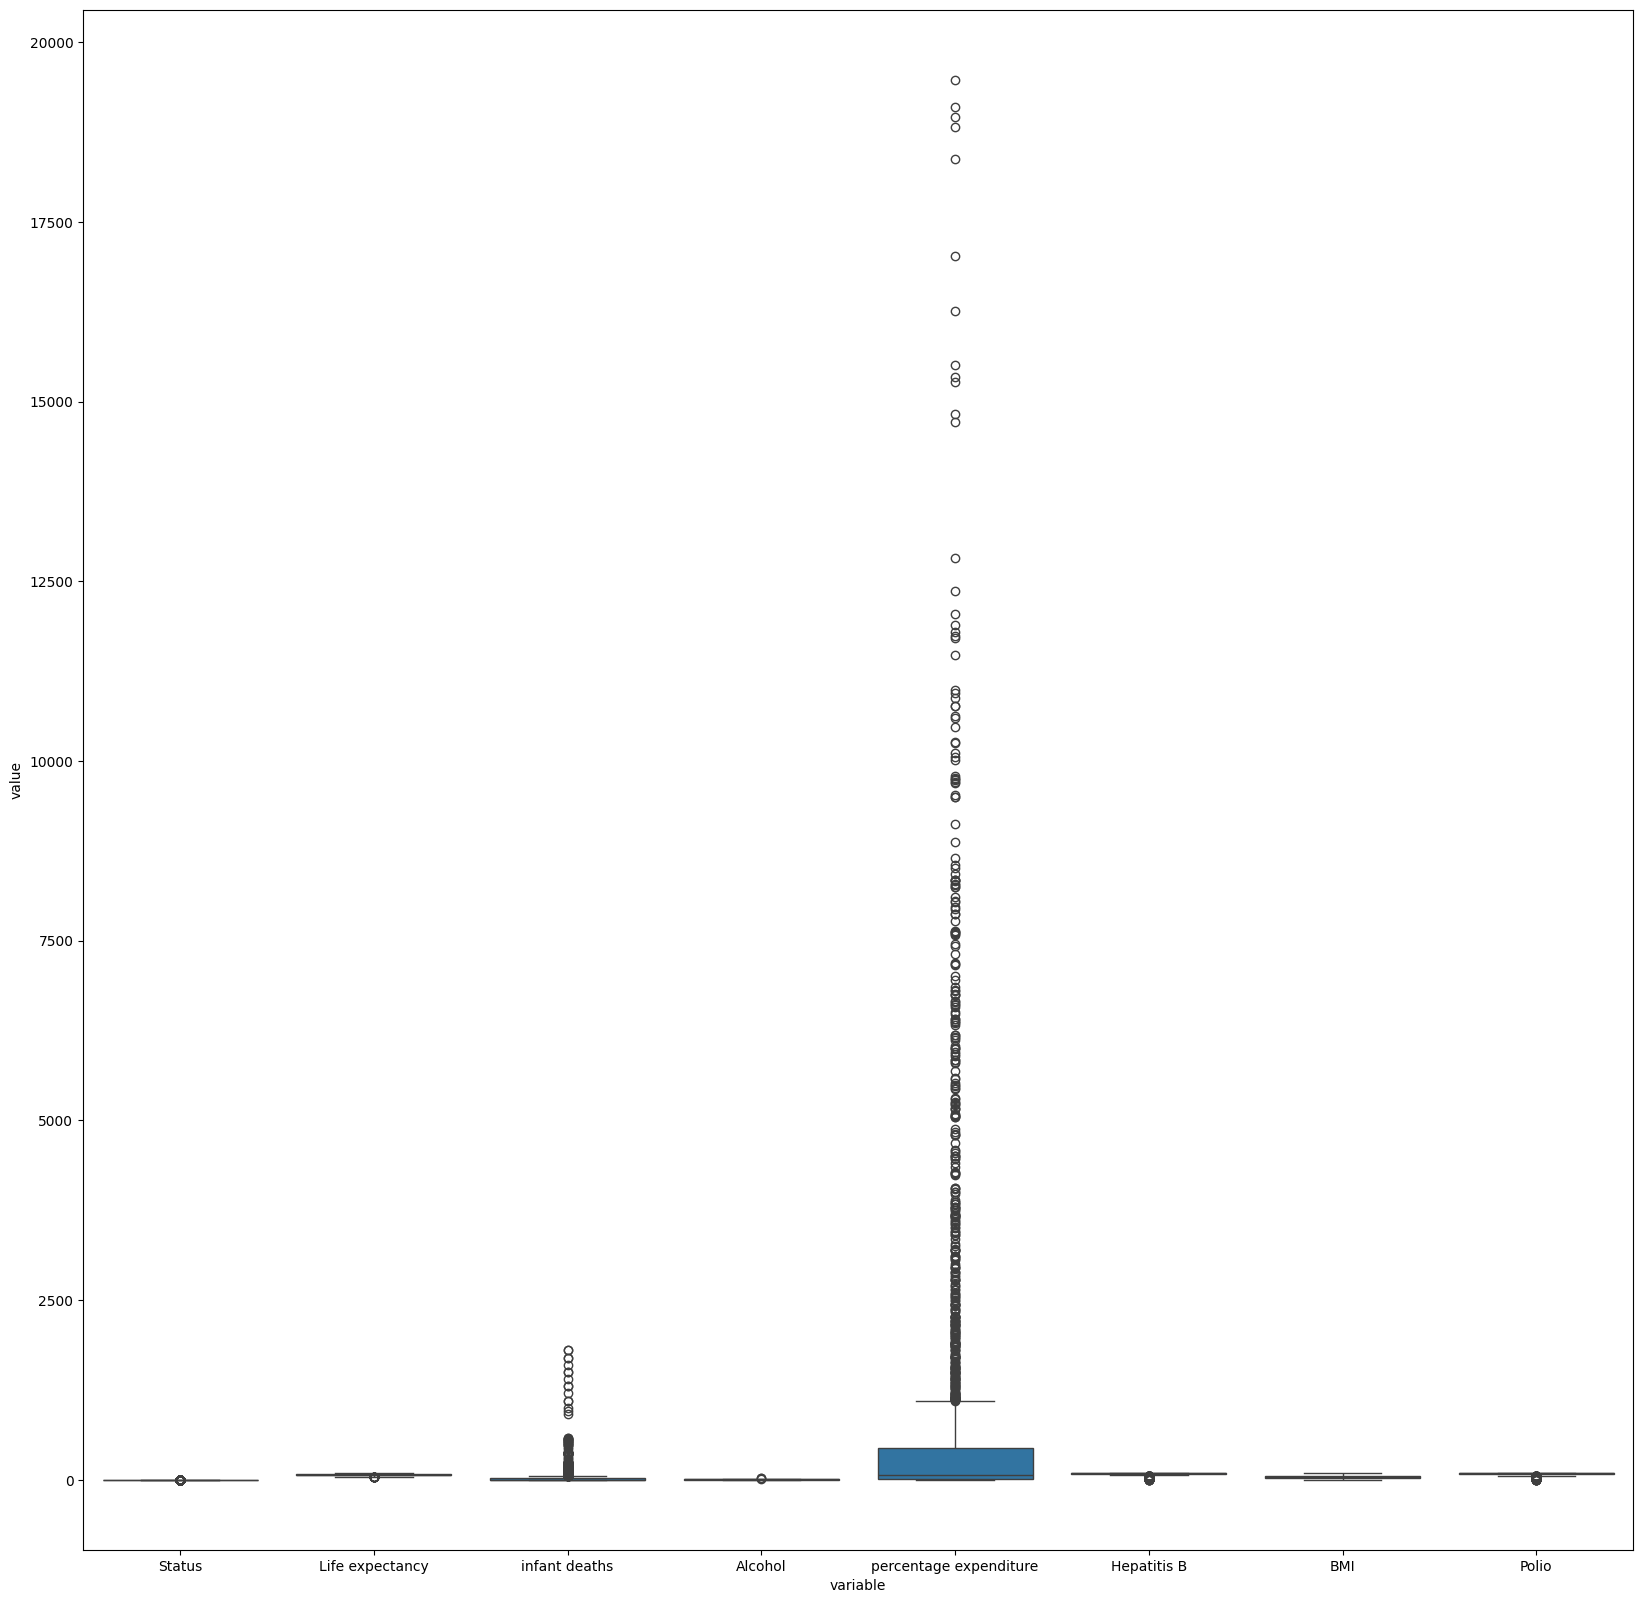

In [33]:
df_melted1 = pd.melt(df, value_vars=df_features[0:8])

plt.figure(figsize=(20, 20))
sns.boxplot(x='variable', y='value', data=df_melted1)


<Axes: xlabel='variable', ylabel='value'>

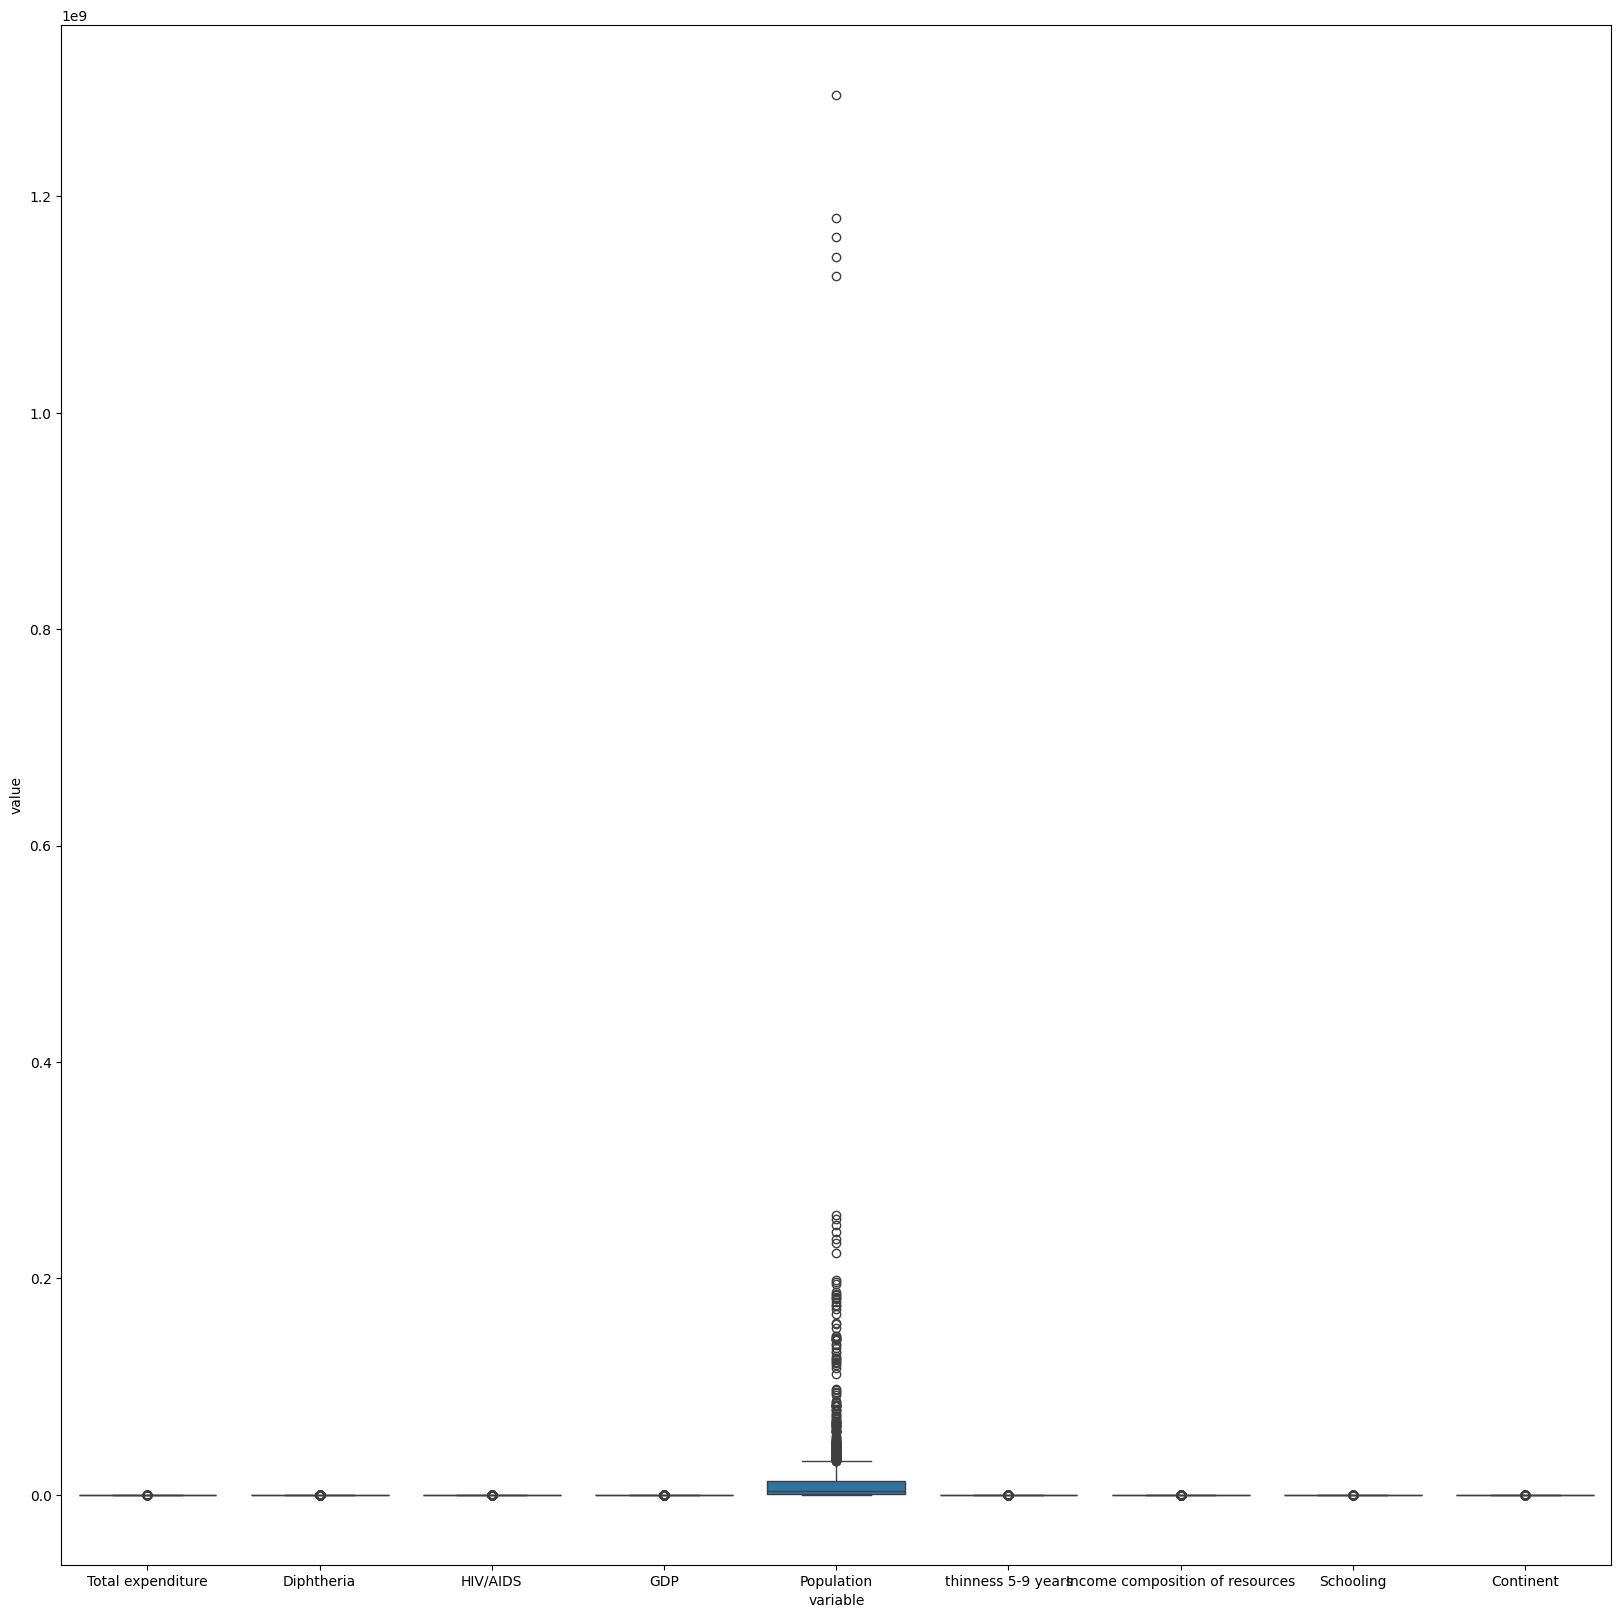

In [34]:
df_melted2 = pd.melt(df, value_vars=df_features[8::])

plt.figure(figsize=(20,20))
sns.boxplot(x='variable', y='value', data=df_melted2)             
                                    

<p>Dari Boxplot di atas, terlihat bahwa pada fitur <strong>Infant Deaths</strong>, <strong>Percentage Expanditure</strong>, dan <strong>Population</strong> terdapat Outliers, yang mana jika ini tidak ditangani maka akan berpengaruh pada performa model yang dibangun.</p>

<h4>Interquartile Range(IQR)</h4>
<pre>Batas Bawah = (Q1-1.5) * IQR
Batas Atas = (Q3+1.5) * IQR</pre>

<p>Function di bawah berfungsi untuk menghasilkan Outliers Threshold, menghitung Outlier Percentage pada setiap features nya, dan mengecek apakah pada suatu feature terdapat Outliers atau tidak.</p>

In [35]:
# Outliers Removal Equation
def outliersThreshold(DataFrame, columns, q1=0.25, q3=0.75):
    Q1 = DataFrame[columns].quantile(q1)
    Q3 = DataFrame[columns].quantile(q3)
    IQR = Q3 - Q1
    up_limit = Q3 + 1.5 * IQR
    low_limit = Q1 - 1.5 * IQR
    
    return low_limit,up_limit

# Outlier Percentage
def outliersPercentage(DataFrame, columns):
    low_limit,up_limit = outliersThreshold(DataFrame, columns)
    outliers = [x for x in DataFrame[columns] if x > up_limit or x < low_limit]
    print(columns)
    print(f'Outliers Percentage: {(len(outliers)/(DataFrame[columns].shape[0])) * 100} %')
    print('-----------------------------------')

# Checking Outliers
def checkOutliers(DataFrame, columns):
    low_limit,up_limit = outliersThreshold(DataFrame, columns)
    outliers = (DataFrame[columns] > up_limit) | (DataFrame[columns] < low_limit)

    if outliers.any():
        return True
    else:
        return False

<p>Berikut merupakan contoh dari implementasi function <strong>outliersPercentage</strong>.</p>

In [36]:
for col in df[numerical_features]:
    outliersPercentage(df, col)

Life expectancy
Outliers Percentage: 0.5786249149081008 %
-----------------------------------
infant deaths
Outliers Percentage: 10.721579305650101 %
-----------------------------------
Alcohol
Outliers Percentage: 0.10211027910142954 %
-----------------------------------
percentage expenditure
Outliers Percentage: 13.240299523485364 %
-----------------------------------
Hepatitis B
Outliers Percentage: 10.755616065350578 %
-----------------------------------
BMI
Outliers Percentage: 0.0 %
-----------------------------------
Polio
Outliers Percentage: 9.496255956432947 %
-----------------------------------
Total expenditure
Outliers Percentage: 1.7358747447243021 %
-----------------------------------
Diphtheria
Outliers Percentage: 10.142954390742002 %
-----------------------------------
HIV/AIDS
Outliers Percentage: 18.447923757658273 %
-----------------------------------
GDP
Outliers Percentage: 10.211027910142954 %
-----------------------------------
Population
Outliers Percentage: 

<p>Setelah function <strong>outliersPercentage</strong> dijalankan, terlihat bahwa pada beberapa features terdapat Outliers, ditandai dengan persentase yang lebih dari 0%.</p>

<p>Function di bawah ini berfungsi untuk mengimpelemntasi teknik Outliers Removal, diantaranya ada <strong>Trimming</strong> dan <strong>Capping</strong>.</p>

In [37]:
def capping(DataFrame, DataFrame2, columns):
    low_limit, up_limit = outliersThreshold(DataFrame, columns)

    DataFrame.loc[(DataFrame[columns] < low_limit), columns] = low_limit
    DataFrame.loc[(DataFrame[columns] > up_limit), columns] = up_limit
    # DataFrame2.loc[(DataFrame2[columns] < low_limit), columns] = low_limit
    # DataFrame2.loc[(DataFrame2[columns] > up_limit), columns] = up_limit

def trimming(DataFrame, columns):
    df = DataFrame

    for col in columns:
        low_limit, up_limit = outliersThreshold(df, col)
        df = df[df[col] < up_limit]
        df = df[df[col] > low_limit]

    return df

<p>Di bawah ini merupakan kode untuk menjalankan function <strong>capping</strong>.</p>

In [38]:
# df = trimming(df, numerical_features)

for col in df[numerical_features]:
    capping(df, df, col)

<p>Di bawah ini merupakan kode untuk melihat Dimension dari DataFrame setelah diimplementasi Outliers Removal.</p>

In [39]:
df.shape

(2938, 17)

<p>Dari Dimension di atas terlihat bahwa tidak ada perubahan pada jumlah Data setelah dilakukan Outliers Removal, ini dikarenakan yang diimplementasi merupakan metode Capping, yang mana bekerja dengan cara Imputasi, sehingga tidak membuang Outliersnya.</p>

<p>Kode di bawah berfungsi untuk melihat persentase Outliers setelah dilakukan Outliers Removal.</p>

In [40]:
for col in df[numerical_features]:
    outliersPercentage(df, col)

Life expectancy
Outliers Percentage: 0.0 %
-----------------------------------
infant deaths
Outliers Percentage: 0.0 %
-----------------------------------
Alcohol
Outliers Percentage: 0.0 %
-----------------------------------
percentage expenditure
Outliers Percentage: 0.0 %
-----------------------------------
Hepatitis B
Outliers Percentage: 0.0 %
-----------------------------------
BMI
Outliers Percentage: 0.0 %
-----------------------------------
Polio
Outliers Percentage: 0.0 %
-----------------------------------
Total expenditure
Outliers Percentage: 0.0 %
-----------------------------------
Diphtheria
Outliers Percentage: 0.0 %
-----------------------------------
HIV/AIDS
Outliers Percentage: 0.0 %
-----------------------------------
GDP
Outliers Percentage: 0.0 %
-----------------------------------
Population
Outliers Percentage: 0.0 %
-----------------------------------
thinness 5-9 years
Outliers Percentage: 0.0 %
-----------------------------------
Income composition of reso

<p>Dari output di atas, terlihat bahwa persentase outliers pada setiap features menjadi <strong>0%</strong>. Itu berarti penerapan Outliers Removal berjalan dengan sukses.</p>

<h3>1.2.2 Outliers Removal Results</h3>

<p>Kode di bawah berfungsi untuk mengidentifikasi Outliers pada seluruh features setelah diimplementasi Outliers Removal.</p>

<Axes: xlabel='variable', ylabel='value'>

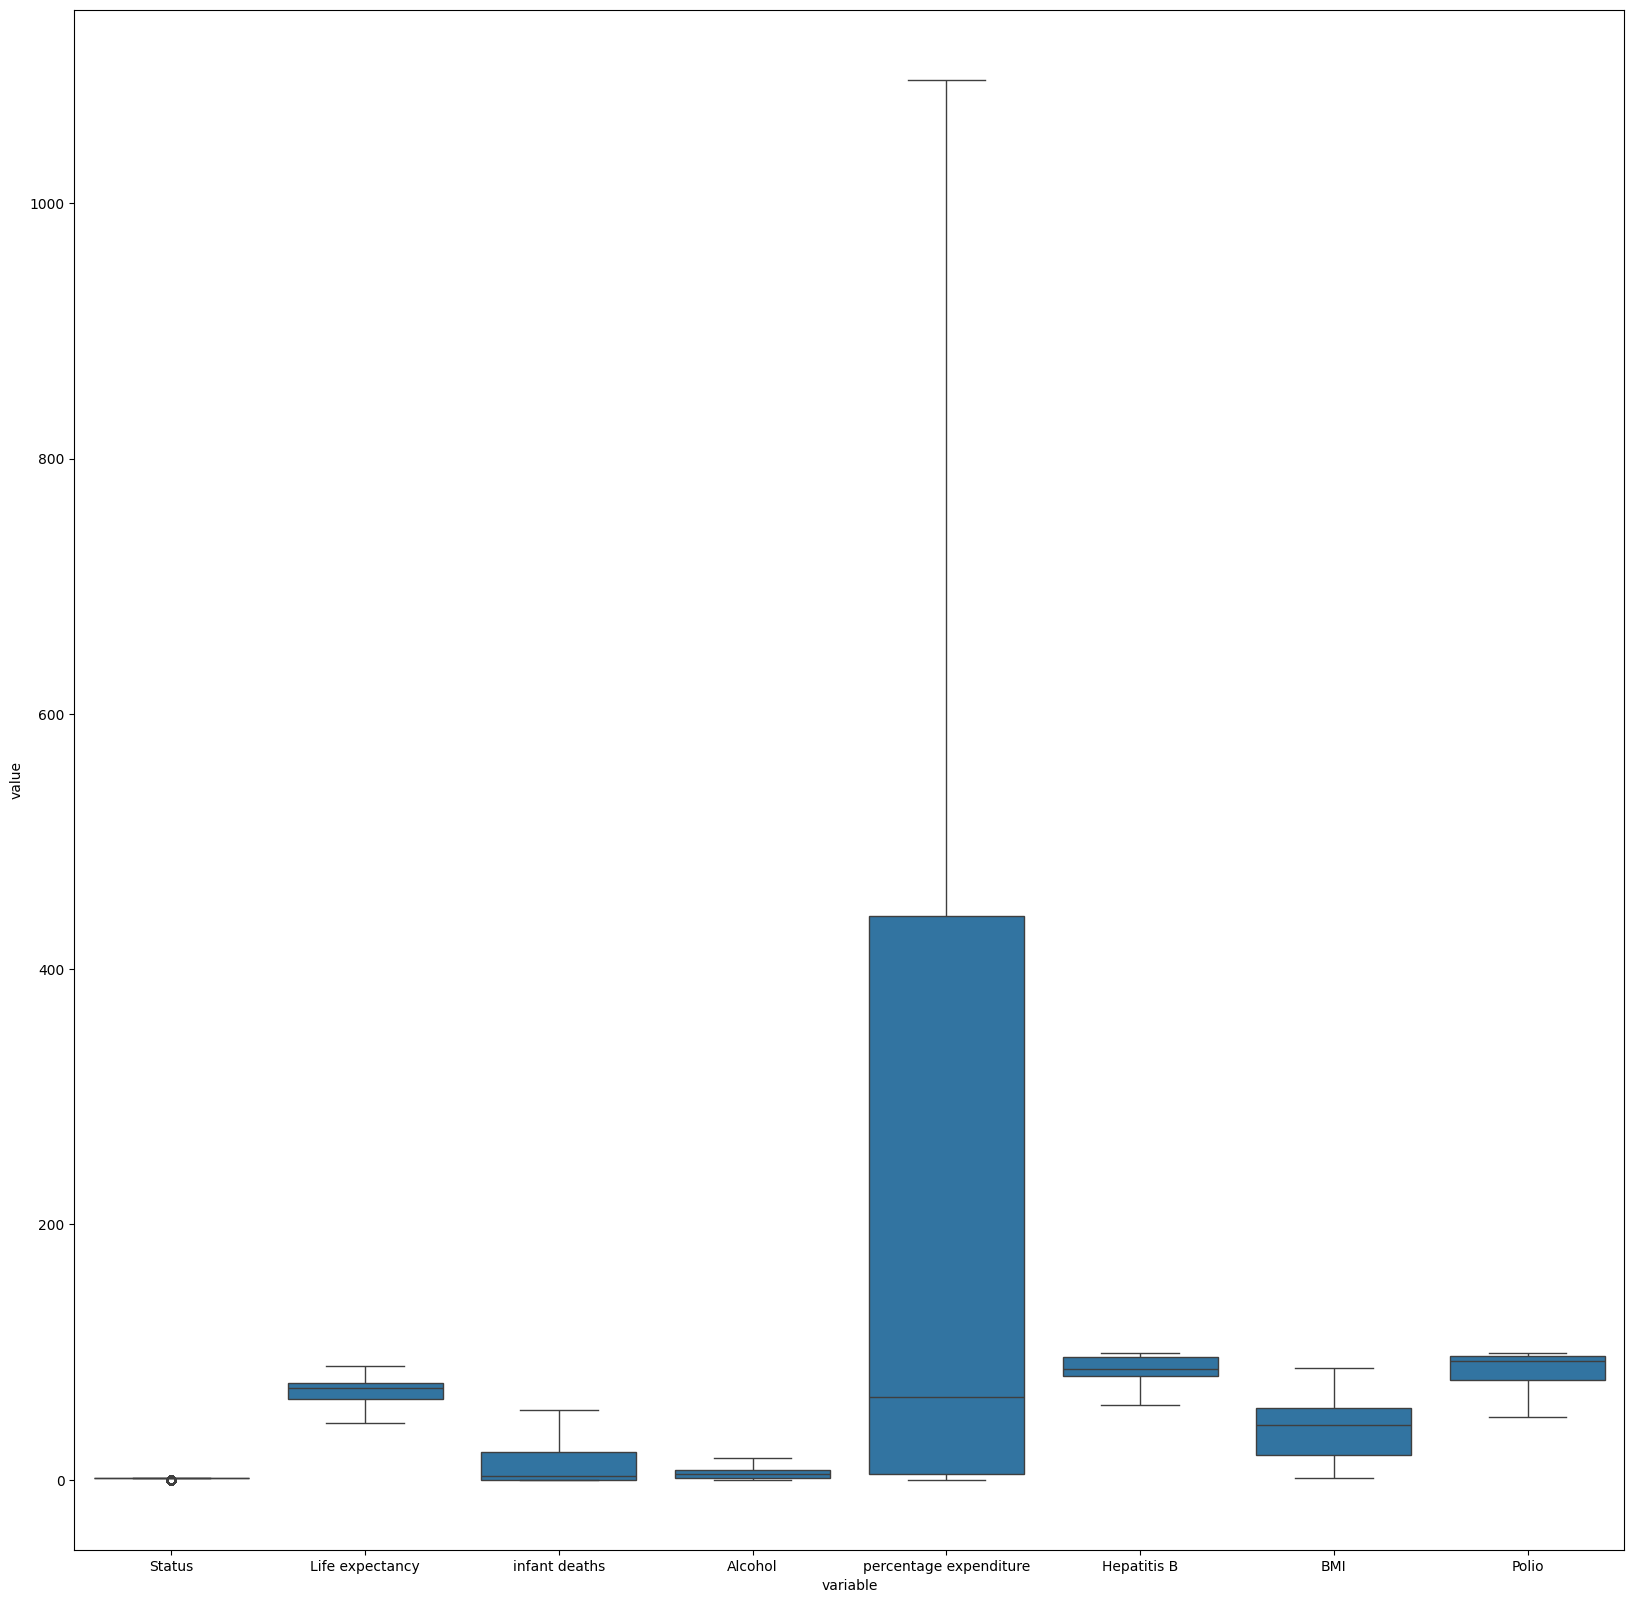

In [41]:
df_melted1 = pd.melt(df, value_vars=df_features[0:8])

plt.figure(figsize=(20, 20))
sns.boxplot(x='variable', y='value', data=df_melted1)

<Axes: xlabel='variable', ylabel='value'>

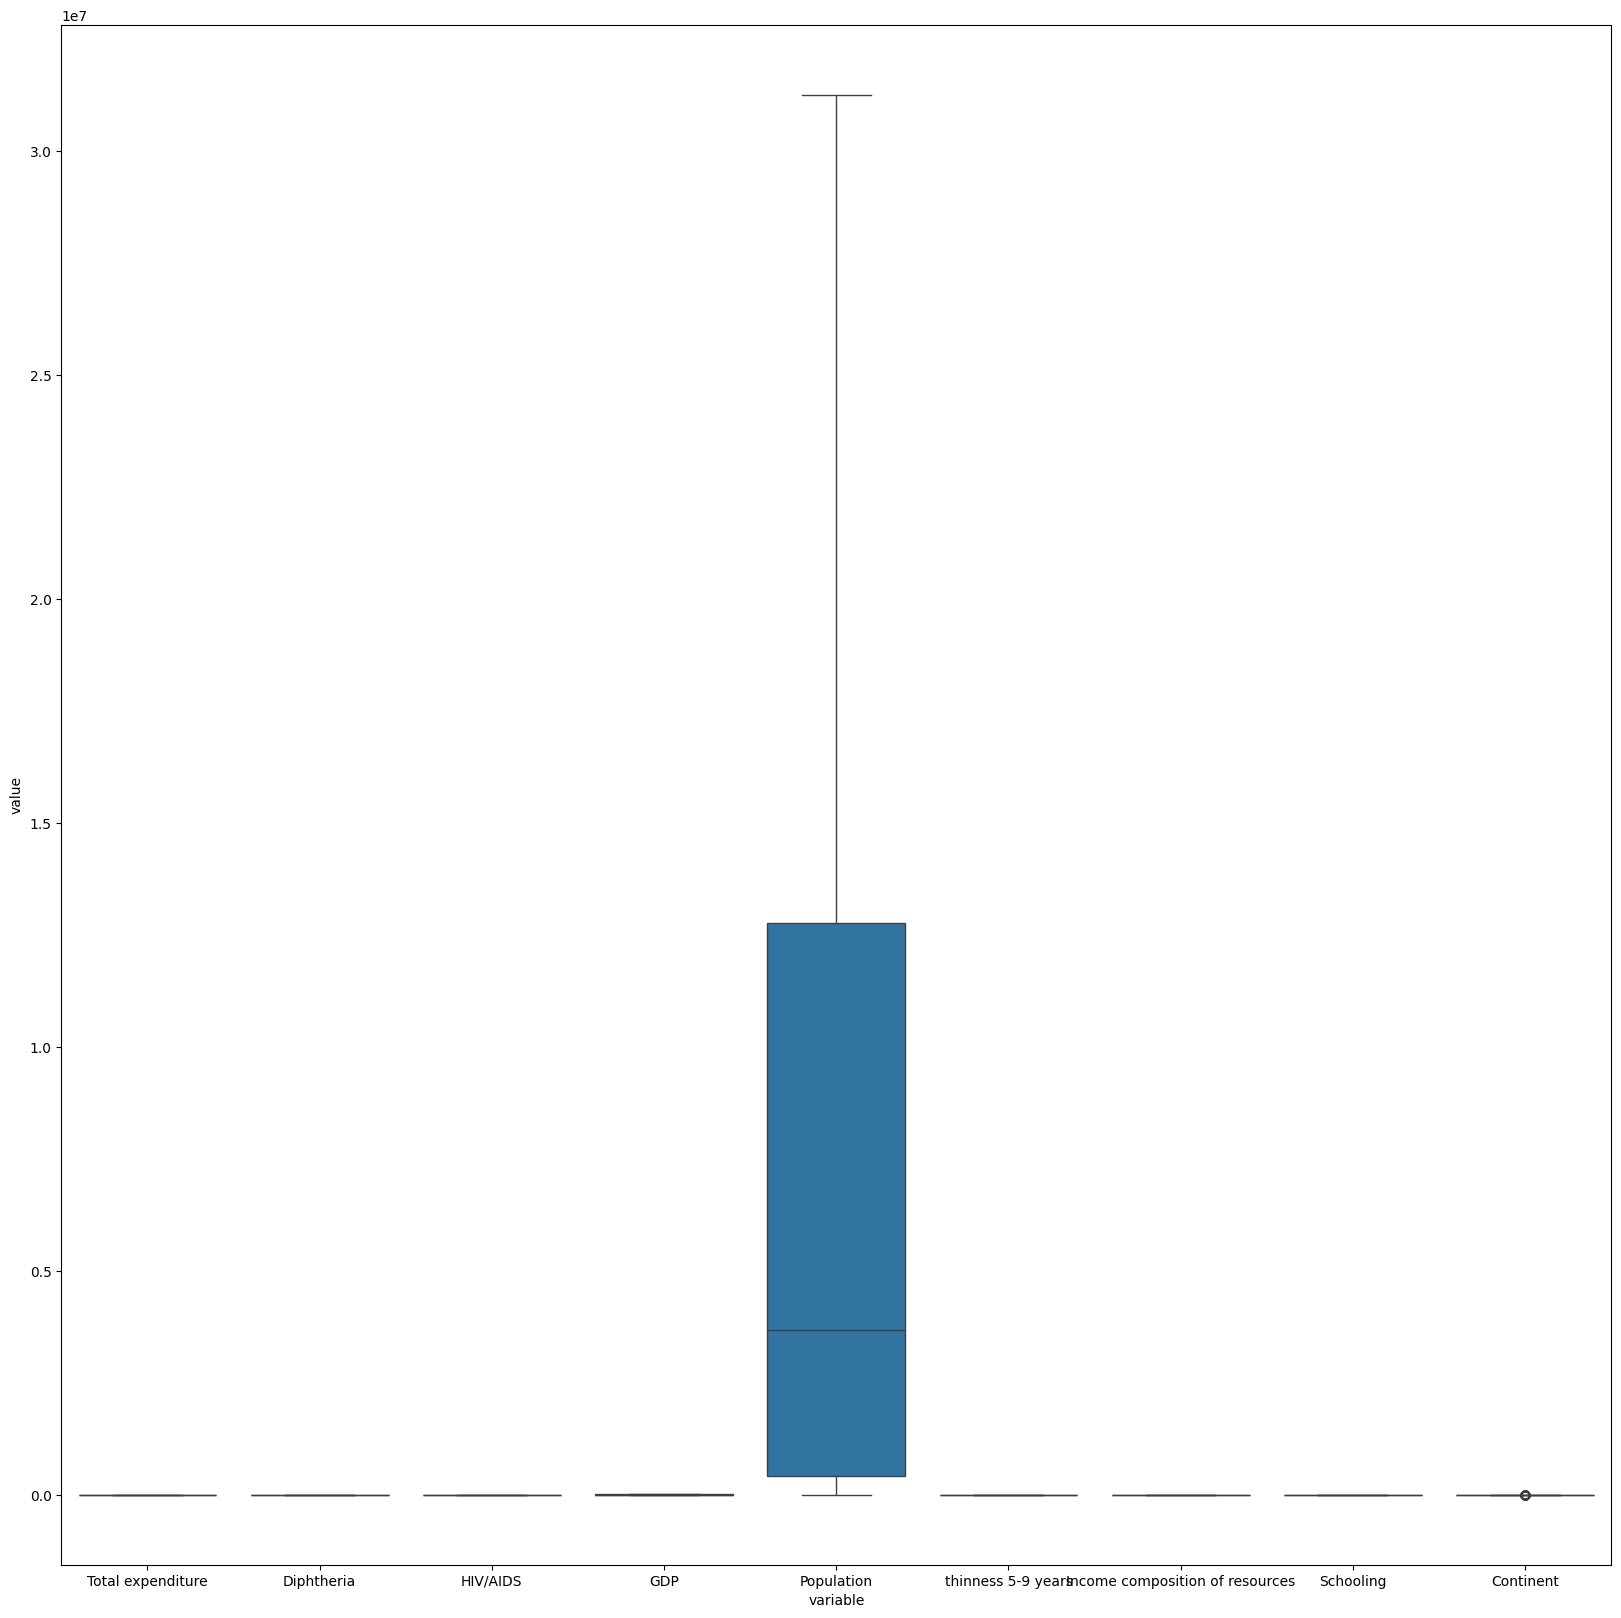

In [42]:
df_melted2 = pd.melt(df, value_vars=df_features[8::])

plt.figure(figsize=(20,20))
sns.boxplot(x='variable', y='value', data=df_melted2)  

<p>Dari Boxplot di atas, terlihat bahwa outliers pada features <strong>Infant Deaths</strong>, <strong>Percentage Expanditure</strong>, dan <strong>Population</strong> telah berhasil ditangani.</p>

<h1>3. Model Selection</h1>
<ul>
    <li>K-Nearest Neighbor</li>
    <li>Random Forest</li>
    <li>Boosting Algorithm</li>
</ul>

<h2>3.1 Train-Test Split</h2>

<p>Kode di bawah berfungsi untuk membagi Datasets menjadi Data Latih dan Data Uji, dengan Proportion <strong>90% Data Latih</strong> dan <strong>10% Data Uji</strong>.</p>

In [43]:
X = df.drop(columns='Life expectancy')
y = df['Life expectancy']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1, random_state=123)

print(f'Total sample in whole dataset: {len(X)}')
print(f'Total sample in train dataset: {len(X_train)}')
print(f'Total sample in test dataset: {len(X_test)}')

Total sample in whole dataset: 2938
Total sample in train dataset: 2644
Total sample in test dataset: 294


<p>Setelah dijalankan, terlihat bahwa jumlah data pada Data Latih sebanyak <strong>2644</strong> data, dan pada data uji sebanyak <strong>294</strong> data.</p>

<h2>1.2 Data Transformation(Continued)</h2>

<h3>1.2.2 Standardrization</h3>

<p>Kode di bawah ini berfungsi untuk menampilkan nama-nama features yang merupakan data numerik.</p>

In [44]:
numerical_features

['Life expectancy',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'BMI',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

<p>Output di atas merupakan nama-nama features yang merupakan data numerik.</p>

<p>Kode di bawah ini berfungsi untuk menghapus value <strong>Life expectancy</strong> dari suatu List <strong>numerical_features</strong>. Penghapusan dilakukan karena <strong>Life Expectancy</strong> merupakan feature Label/Target.</p>

In [45]:
numerical_features.remove('Life expectancy')

<p>Berikut merupakan jumlah element pada List <strong>numerical_features</strong> setelah dilakukan penghapusan.</p>

In [46]:
len(numerical_features)

14

<p>Kode di bawah ini berfungsi untuk mengimplementasi Standardrization pada data latih.</p>

In [47]:
scaler = StandardScaler()

scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

infant deaths   Alcohol  percentage expenditure  Hepatitis B       BMI  \
249       -0.721687  1.628800                2.080835     0.728844 -1.600112   
569        2.136211 -0.337025               -0.655603     0.496592 -0.675383   
2114      -0.669725  1.958140               -0.731879     1.115930  0.486845   
252       -0.721687  1.705391                0.569085    -1.593676  1.067960   
1391      -0.721687 -1.049318               -0.550429    -0.432416  1.588436   

         Polio  Total expenditure  Diphtheria  HIV/AIDS       GDP  Population  \
249   0.868985           1.431268    0.808856 -0.634698  2.269676   -0.695618   
569   0.552273          -0.600789    0.492820 -0.634698 -0.863446   -0.868094   
2114  0.805643           1.134107    0.808856 -0.634698  0.419950    0.563576   
252   0.678958           1.488079    0.619234 -0.634698 -0.248051   -0.714926   
1391  0.678958           1.400678   -0.518495 -0.634698 -0.769234   -0.859753   

      thinness 5-9 years  Income composition of resources  Schooling  
249            -0.993838                         1.222108   1.195279  
569            -0.115740                         0.079380  -0.324485  
2114           -0.341537                        -0.016885  -0.003461  
252            -0.993838                         1.289941   2.133005  
1391           -1.144369                        -2.755916  -0.098137

<p>Output di atas merupakan hasil dari implementasi Standardrization, dimana bisa dilihat bahwa seluruh values berada di skala yang sama.</p>

<p>Kode di bawah berfungsi untuk membuat suatu DataFrame bernama <strong>models</strong> yang nantinya digunakan untuk menyimpan nilai mean-squared error hasil dari proses pelatihan dan pengujian.</p>

In [48]:
models = pd.DataFrame(index=['KNN','RandomForest','Boosting'],
                      columns=['train_mse', 'test_mse'])

<h2>3.1 K-Nearest Neighbor</h2>

<p>Berikut merupakan code untuk Training ML Model menggunakan Algorithm K-Nearest Neighbor.</p>

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['KNN','train_mse'] = mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train)

<p>Berikut merupakan nilai mse setelah proses pelatihan.</p>

In [50]:
models.head()

train_mse test_mse
KNN           8.013816      NaN
RandomForest       NaN      NaN
Boosting           NaN      NaN

<h2>3.2 Random Forest</h2>

<p>Berikut merupakan code untuk Training ML Model menggunakan Algorithm Random Forest.</p>

In [51]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['RandomForest','train_mse'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

<p>Berikut merupakan nilai mse setelah proses pelatihan.</p>

In [52]:
models.head()

train_mse test_mse
KNN           8.013816      NaN
RandomForest  0.671714      NaN
Boosting           NaN      NaN

<h2>3.3 Adaptive Boosting(AdaBoost)</h2>

<p>Berikut merupakan code untuk Training ML Model menggunakan Algorithm AdaBoost.</p>

In [53]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(learning_rate=0.05, random_state=55)
adaboost.fit(X_train, y_train)

models.loc['Boosting','train_mse'] = mean_squared_error(y_pred=adaboost.predict(X_train), y_true=y_train)

<p>Berikut merupakan nilai mse setelah proses pelatihan.</p>

In [54]:
models.head()

train_mse test_mse
KNN            8.013816      NaN
RandomForest   0.671714      NaN
Boosting      14.070159      NaN

<h1>4. Model Evaluation</h1>

<p>Kode di bawah ini berfungsi untuk mengimplementasi Standardrization pada data uji.</p>

In [55]:
# Standardrization Test Set
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

C:\Users\DELL\AppData\Local\Temp\ipykernel_23720\1126892872.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.40991641  0.10970148 -0.61776356 -0.56580177 -0.61776356 -0.72168714
 -0.56580177 -0.56580177  2.13621122 -0.61776356  0.0057779   1.56463155
 -0.66972535 -0.56580177 -0.66972535  2.13621122 -0.61776356  0.21362505
 -0.66972535 -0.61776356 -0.66972535 -0.35795462  2.13621122 -0.56580177
  0.94109009  0.78520472  0.83716651  2.13621122 -0.72168714 -0.72168714
 -0.66972535 -0.72168714  2.13621122 -0.66972535 -0.09814568  0.78520472
 -0.72168714 -0.66972535 -0.35795462 -0.72168714 -0.35795462 -0.30599283
 -0.72168714  2.13621122 -0.66972535  2.13621122 -0.72168714 -0.66972535
 -0.72168714 -0.72168714  0.78520472 -0.72168714  1.25286082 -0.61776356
  0.78520472 -0.61776356  1.20089903 -0.25403104  2.13621122 -0.72168714
 -0.56580177 -0.72168714 -0.72168714 -0.72168714 -0.30599283 -0.20206925
  1.98032585 

<p>Berikut merupakan hasil dari impelemntasi Standardrization terhadap data latih.</p>

In [56]:
X_test[numerical_features]

infant deaths   Alcohol  percentage expenditure  Hepatitis B       BMI  \
775       -0.409916  0.362502                0.972352    -0.122747  0.774876   
527        0.109701 -0.788910               -0.652935    -0.282191 -1.099849   
553       -0.617764  0.696948                2.080835     0.806261  1.002269   
2670      -0.565802 -0.847629               -0.565558     1.038513  0.921418   
2047      -0.617764  1.608376               -0.695196     1.038513  0.926471   
...             ...       ...                     ...          ...       ...   
524        0.161663 -0.794016               -0.613616    -0.282191 -1.049317   
2024       2.084249 -0.020451               -0.651682    -1.361424 -0.680436   
2485      -0.721687 -0.017898               -0.648877    -0.282191  0.577802   
1652      -0.305993 -1.171863               -0.524346    -0.045330 -1.776973   
1793       2.136211 -1.069742               -0.723103    -0.282191 -1.195859   

         Polio  Total expenditure  Diphtheria  HIV/AIDS       GDP  Population  \
775  -0.017809          -0.565829    0.176784  0.516340  0.057029    0.242705   
527  -2.266464          -0.723150   -2.256693  1.883198 -0.873394   -0.447606   
553   0.552273           0.124633    0.556027 -0.634698  0.777519    0.964348   
2670  0.805643           0.281954    0.808856 -0.634698 -0.842915   -0.685282   
2047  0.868985           0.168334    0.872063 -0.634698 -0.715688   -0.826724   
...        ...                ...         ...       ...       ...         ...   
524  -2.266464          -0.692560   -2.256693  1.883198 -0.865763   -0.422133   
2024 -0.524548          -0.517759   -1.150567 -0.634698 -0.409017   -0.856954   
2485 -0.714575           0.316914   -0.644910  0.660220 -0.869893   -0.814692   
1652 -0.081151          -0.928541   -0.076045  0.516340 -0.679895   -0.864354   
1793 -0.081151          -1.483533   -0.392081 -0.203059 -0.891217   -0.816592   

      thinness 5-9 years  Income composition of resources  Schooling  
775            -0.366625                         0.345495   0.289888  
527            -0.818219                        -1.663411  -2.199938  
553            -0.968750                         0.862071   0.936596  
2670            0.386030                         0.413328   0.774919  
2047           -0.592422                         0.924686   0.968931  
...                  ...                              ...        ...  
524            -0.918573                        -1.642539  -2.070597  
2024            1.239039                         0.235918  -0.098137  
2485           -0.316448                        -2.755916  -0.356820  
1652            0.737269                        -0.635477  -1.132870  
1793            2.242580                        -1.021605  -1.423889  

[294 rows x 14 columns]

<p>Bisa dilihat bahwa sekarang seluruh values berada di skala yang sama.</p>

<p>Kode di bawah berfungsi untuk melakukan evaluasi model menggunakan data uji.</p>

In [57]:
model_dict = {'KNN': knn,
              'RandomForest': RF,
              'Boosting': adaboost}

for name, model in model_dict.items():
    models.loc[name,'test_mse'] = mean_squared_error(y_pred=model.predict(X_test), y_true=y_test)/1e3

models.head()

train_mse  test_mse
KNN            8.013816  0.009676
RandomForest   0.671714  0.004237
Boosting      14.070159  0.015997

<p>Dari hasil evaluasi model terhadap data latih dan uji, terlihat bahwa model dengan Algoritma <strong>Random Forest</strong> lah yang memiliki performa paling optimal berdasarkan metrics mse.</p>

<p>Kode di bawah ini berfungsi untuk melakukan reset index.</p>

In [58]:
models = models.reset_index(names=['Model'])
models.head()

Model  train_mse  test_mse
0           KNN   8.013816  0.009676
1  RandomForest   0.671714  0.004237
2      Boosting  14.070159  0.015997

<p>Output di atas merupakan kondisi dari DataFrame <strong>"models"</strong> setelah dilakukan reset index.</p>

<p>Kode di bawah berfungsi untuk menampilkan Line Chart dari performa model.</p>

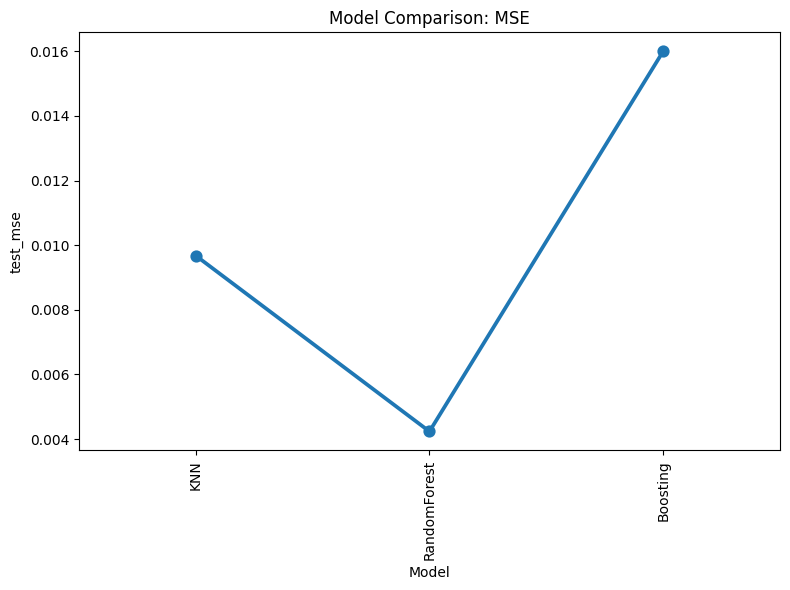

In [59]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model', y='test_mse', data=models)
plt.xticks(rotation = 90)
plt.title('Model Comparison: MSE')
plt.tight_layout()
plt.show()

<p>Dari Line Chart di atas, dapat disimpulkan bahwa model dengan Algorithm <strong>RandomForest</strong> merupakan model yang paling optimal berdasarkan metrics mse.</p>

<h2>4.1 Feature Importance</h2>

<p>Kode di bawah ini berfungsi untuk melihat feature mana saja kah yang paling berperan selama pelatihan Model, kemudian mengurutkannya secara Descending.</p>

In [60]:
feature_importance = RF.feature_importances_

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

feature_importance

Feature  Importance
9                          HIV/AIDS    0.596159
13  Income composition of resources    0.179988
14                        Schooling    0.046993
15                        Continent    0.044540
1                     infant deaths    0.026454
12               thinness 5-9 years    0.023979
2                           Alcohol    0.018524
5                               BMI    0.012596
7                 Total expenditure    0.011676
8                        Diphtheria    0.008463
11                       Population    0.006598
6                             Polio    0.006247
3            percentage expenditure    0.006171
10                              GDP    0.005106
4                       Hepatitis B    0.004954
0                            Status    0.001550

<p>Dari DataFrame <strong>feature_importance</strong> di atas, dapat dilihat bahwa feature <strong>HIV/AIDS</strong> merupakan fitur yang paling berperan selama proses pelatihan model.</p>

<p>Berikut merupakan kode untuk menampilkan Bar Plot dari <strong>feature_importance<strong>.</p>

Text(0.5, 1.0, 'Feature Importance of Random Forest Algorithm')

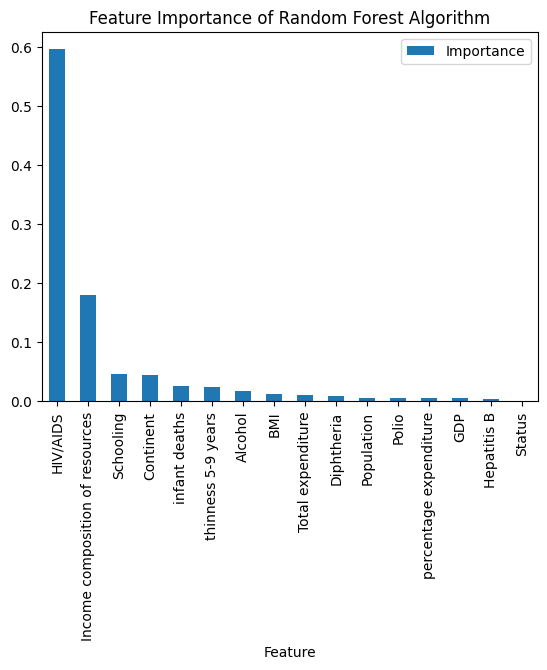

In [61]:
feature_importance.plot.bar(x='Feature', y='Importance')
plt.title('Feature Importance of Random Forest Algorithm')

<h2>4.2 Prediction</h2>

<p>Berikut merupakan kode untuk melakukan prediksi.</p>

In [62]:
prediction = X_test.iloc[:1].copy()
pred_dict = {'y_true': y_test[:1]}

for name,model in model_dict.items():
    pred_dict[f'{name}_pred'] = model.predict(prediction).round(1)

pred_dict

{'y_true': 775    72.7
 Name: Life expectancy, dtype: float64,
 'KNN_pred': array([72.5]),
 'RandomForest_pred': array([72.8]),
 'Boosting_pred': array([69.5])}

<p>Dari hasil prediksi ketiga model di atas, terlihat bahwa model RandomForest lah yang menghasilkan prediksi paling mendekati nilai aslinya dibandingkan dengan 2 model lainnya. Ini berarti bahwa hasil dari perhitungan mse sudah tepat.</p>